# Regresi√≥n Log√≠stica (Hito 2 y 3)

### Indice


- [1. Librer√≠as](#1-librer√≠as)
- [2. Carga de los datos de test y train.](#2-carga-de-los-datos-de-test-y-train)
- [3. Regresi√≥n Log√≠stica](#3-regresi√≥n-log√≠stica)
    - [3.1 Entrenamiento del modelo](#31-entrenamiento-del-modelo)
    - [3.2 M√©tricas de rendimiento globales (accuracy, precision, recall, F1)](#32-m√©tricas-de-rendimiento-globales-accuracy-precision-recall-f1)
    - [3.3 Matriz de confusi√≥n (an√°lisis detallado de aciertos y errores por clase).](#33-matriz-de-confusi√≥n-an√°lisis-detallado-de-aciertos-y-errores-por-clase)
    - [üìë An√°lisis del Modelo de Regresi√≥n Log√≠stica (con matriz de confusi√≥n normalizada)](#an√°lisis-del-modelo-de-regresi√≥n-log√≠stica-con-matriz-de-confusi√≥n-normalizada)
    - [3.4 Coeficientes del modelo](#34-coeficientes-del-modelo)
    - [3.5 Curva ROC - AUC](#35-curva-roc---auc)
    - [An√°lisis de la Curva ROC Multiclase](#an√°lisis-de-la-curva-roc-multiclase)
    - [3.6 Visualizaci√≥n de la frontera de decisi√≥n 2D (limitaciones de linealidad).](#36-visualizaci√≥n-de-la-frontera-de-decisi√≥n-2d-limitaciones-de-linealidad)
    - [3.4 An√°lisis de la Frontera de Decisi√≥n (2D)](#34-an√°lisis-de-la-frontera-de-decisi√≥n-2d)
  - [4. Distribuci√≥n de clases en train y test](#4-distribuci√≥n-de-clases-en-train-y-test)
    - [4.1An√°lisis:](#41an√°lisis)
    - [Interpretaci√≥n del DataFrame de Distribuci√≥n de Clases](#interpretaci√≥n-del-dataframe-de-distribuci√≥n-de-clases)
    - [4.2 Manejo del desvalanceo de clases.](#42-manejo-del-desvalanceo-de-clases)
    - [4.3 Guardar los conjuntos balanceados en PKL con nombres distintos](#43-guardar-los-conjuntos-balanceados-en-pkl-con-nombres-distintos)
    - [4.4 Visualizar la distribuci√≥n final](#44-visualizar-la-distribuci√≥n-final)
    - [4 Justificaci√≥n metodol√≥gica del manejo del desbalanceo de clases](#4-justificaci√≥n-metodol√≥gica-del-manejo-del-desbalanceo-de-clases)
- [5. Entrenamiento del Modelo Par√°metros Default: test / train oversampled](#5-entrenamiento-del-modelo-par√°metros-default-test-train-oversampled)
    - [5.1 Carga de los Pkl balanceados](#51-carga-de-los-pkl-balanceados)
    - [5.2 Entrenamiento del modelo](#52-entrenamiento-del-modelo)
    - [5.3 Evaluaci√≥n del modelo](#53-evaluaci√≥n-del-modelo)
    - [üìä 5.3 Comparaci√≥n de Modelos: Datos Balanceados vs. No Balanceados](#53-comparaci√≥n-de-modelos-datos-balanceados-vs-no-balanceados)
    - [An√°lisis de Fronteras de Decisi√≥n con Datos Balanceados y No Balanceados](#an√°lisis-de-fronteras-de-decisi√≥n-con-datos-balanceados-y-no-balanceados)
- [5. Conclusi√≥n Final: Modelo de Regresi√≥n Log√≠stica (Oversampled - Baseline)](#5-conclusi√≥n-final-modelo-de-regresi√≥n-log√≠stica-oversampled---baseline)
    - [1. Rendimiento global sobre el conjunto de prueba](#1-rendimiento-global-sobre-el-conjunto-de-prueba)
    - [2. Matriz de confusi√≥n](#2-matriz-de-confusi√≥n)
    - [3. Coeficientes principales por clase](#3-coeficientes-principales-por-clase)
    - [4. Curvas ROC y AUC por clase](#4-curvas-roc-y-auc-por-clase)
    - [Conclusi√≥n general](#conclusi√≥n-general)
- [6. Modelo con Hiperpar√°metros](#6-modelo-con-hiperpar√°metros)
    - [6.1 Definir hiperpar√°metros y cross-validation](#61-definir-hiperpar√°metros-y-cross-validation)
    - [6.2 Entrenamiento del Grid Search sobre train oversampled](#62-entrenamiento-del-grid-search-sobre-train-oversampled)
    - [Resultados del Grid Search: Regresi√≥n Log√≠stica](#resultados-del-grid-search-regresi√≥n-log√≠stica)
    - [Evaluaci√≥n del Modelo de Regresi√≥n Log√≠stica Multiclase](#evaluaci√≥n-del-modelo-de-regresi√≥n-log√≠stica-multiclase)
    - [Interpretaci√≥n](#interpretaci√≥n)
    - [Variables m√°s influyentes por clase](#variables-m√°s-influyentes-por-clase)
    - [An√°lisis de Curvas ROC y AUC por clase](#an√°lisis-de-curvas-roc-y-auc-por-clase)
  - [Hallazgos y conclusi√≥n final](#hallazgos-y-conclusi√≥n-final)
    - [Hallazgos](#hallazgos)
    - [Conclusi√≥n final](#conclusi√≥n-final)
    - [6.6 Frontera de Decisi√≥n 2D con Mejores Hiperpar√°metros](#66-frontera-de-decisi√≥n-2d-con-mejores-hiperpar√°metros)
- [7. Comparacion de los modelos: par√°metros de f√°brica vs hiperpar√°metros](#7-comparacion-de-los-modelos-par√°metros-de-f√°brica-vs-hiperpar√°metros)
    - [7.1 Carga de los modelos](#71-carga-de-los-modelos)
    - [7.2 Verificaci√≥n de consistencia](#72-verificaci√≥n-de-consistencia)
    - [7.3 Evaluacion de los modelos](#73-evaluacion-de-los-modelos)
    - [Comparaci√≥n de Modelos de Regresi√≥n Log√≠stica (8 clases)](#comparaci√≥n-de-modelos-de-regresi√≥n-log√≠stica-8-clases)
    - [Comparaci√≥n de Modelos de Regresi√≥n Log√≠stica (8 clases)](#comparaci√≥n-de-modelos-de-regresi√≥n-log√≠stica-8-clases)
    - [An√°lisis de resultados de Coeficientes de los Modelos](#an√°lisis-de-resultados-de-coeficientes-de-los-modelos)
    - [Consideraciones Finales](#consideraciones-finales)
  - [Comparaci√≥n de ROC-AUC: Modelo Default vs Modelo con Hyperpar√°metros](#comparaci√≥n-de-roc-auc-modelo-default-vs-modelo-con-hyperpar√°metros)
    - [1. Contexto](#1-contexto)
    - [2. Resultados](#2-resultados)
    - [3. Interpretaci√≥n](#3-interpretaci√≥n)
    - [4. Conclusi√≥n](#4-conclusi√≥n)
- [Carpetas de resultados](#carpetas-de-resultados)
- [Generar fronteras completas](#generar-fronteras-completas)
    - [Visualizaci√≥n de la Frontera de Decisi√≥n 2D](#visualizaci√≥n-de-la-frontera-de-decisi√≥n-2d)
- [Selecci√≥n de las 2 features m√°s importantes](#selecci√≥n-de-las-2-features-m√°s-importantes)
- [Graficar](#graficar)
    - [An√°lisis del Gr√°fico](#an√°lisis-del-gr√°fico)
- [8 Conclusi√≥n Final](#8-conclusi√≥n-final)

## 1. Librer√≠as

In [ ]:
# ==========================================================
# üì¶ Librer√≠as est√°ndar de Python
# ==========================================================
import warnings
import time
import os
import pickle
from collections import Counter
import json
# Ignorar warnings innecesarios
warnings.filterwarnings("ignore")

# ==========================================================
# üî¢ Ciencia de Datos y Manipulaci√≥n
# ==========================================================
import numpy as np
import pandas as pd

from tabulate import tabulate  
# ==========================================================
# üìä Visualizaci√≥n
# ==========================================================
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

# Configuraci√≥n est√©tica
sns.set(style="whitegrid")
%matplotlib inline

# ==========================================================
# ü§ñ Machine Learning (scikit-learn)
# ==========================================================
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, classification_report
)
from sklearn.utils import resample

# ==========================================================
# ‚öñÔ∏è Manejo de Desbalance de Clases
# ==========================================================
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# ==========================================================
# üíæ Guardado y Carga de Modelos
# ==========================================================
import joblib
import pickle

## 2. Carga de los datos de test y train.

##### Esto reemplaza la necesidad de cargar el data_ML.csv y repetir el train_test_split y el StandardScaler.

In [2]:
# Cargar los datos ya listos desde los archivos .pkl
print("Carga de los conjuntos de datos de entrenamiento y prueba desde archivos .pkl...")

X_train = joblib.load('X_train.pkl')
X_test = joblib.load('X_test.pkl')
Y_train = joblib.load('Y_train.pkl')
Y_test = joblib.load('Y_test.pkl')

print("¬°Datos cargados con √©xito! Se comienza el entrenamiento.")

# Se Revisa las dimensiones para confirmar que todo se carg√≥ bien
print("\nForma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)

Carga de los conjuntos de datos de entrenamiento y prueba desde archivos .pkl...
¬°Datos cargados con √©xito! Se comienza el entrenamiento.

Forma de X_train: (1983, 22)
Forma de X_test: (496, 22)


# 3. Regresi√≥n Log√≠stica

### 3.1 Entrenamiento del modelo

In [3]:
# Instanciaci√≥n del modelo de Regresi√≥n Log√≠stica con par√°metros b√°sicos
modelo_RL = LogisticRegression(max_iter=1000, random_state=42)

# Entrenamiento con medici√≥n de tiempo
print("Entrenamiento del modelo de Regresi√≥n Log√≠stica...")
start_time = time.time()
modelo_RL.fit(X_train, Y_train)
end_time = time.time()
train_time = end_time - start_time
print("¬°Entrenamiento completado!")
print(f"Tiempo de entrenamiento: {train_time:.2f} segundos")

# Predicciones del modelo para el conjunto de prueba
y_pred = modelo_RL.predict(X_test)


Entrenamiento del modelo de Regresi√≥n Log√≠stica...
¬°Entrenamiento completado!
Tiempo de entrenamiento: 0.65 segundos


### 3.2 M√©tricas de rendimiento globales (accuracy, precision, recall, F1) 


In [4]:
# Bloque 1: Definici√≥n de la funci√≥n de evaluaci√≥n extendida
def evaluar_clasificador_extendido(modelo, X, y, nombre="Modelo"):
    """
    Eval√∫a un clasificador multiclase e imprime m√©tricas y la matriz de confusi√≥n normalizada.
    """
    # Predicciones del modelo
    y_pred = modelo.predict(X)

    # M√©tricas de evaluaci√≥n (ponderadas para multiclase)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average="weighted")
    rec = recall_score(y, y_pred, average="weighted")
    f1 = f1_score(y, y_pred, average="weighted")

    # Resultados en consola
    print(f"\n=== Evaluaci√≥n Extendida: {nombre} ===")
    print(f"Accuracy                : {acc:.3f}")
    print(f"Precisi√≥n (ponderada)   : {prec:.3f}")
    print(f"Recall (ponderado)      : {rec:.3f}")
    print(f"F1-score (ponderado)    : {f1:.3f}")

    # Matriz de confusi√≥n normalizada (por fila)
    print("\n=== Matriz de confusi√≥n normalizada ===")
    cm = confusion_matrix(y, y_pred, labels=modelo.classes_, normalize="true")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(cmap="Blues", values_format=".2f")
    plt.grid(False)
    plt.title(f"Matriz de Confusi√≥n Normalizada - {nombre}")
    plt.tight_layout()
    plt.show()

    return acc, prec, rec, f1


### 3.3 Matriz de confusi√≥n (an√°lisis detallado de aciertos y errores por clase).

In [5]:
# Predicciones del modelo entrenado (con valores de f√°brica)
y_pred_baseline = modelo_RL.predict(X_test)

# --- Matriz de confusi√≥n absoluta ---
cm_abs = confusion_matrix(Y_test, y_pred_baseline, labels=modelo_RL.classes_)
cm_abs_df = pd.DataFrame(cm_abs, 
                         index=[f"Clase {c}" for c in modelo_RL.classes_],
                         columns=[f"Clase {c}" for c in modelo_RL.classes_])

# Imprimir DataFrame
print("\n=== Matriz de Confusi√≥n - Valores absolutos ===")
display(cm_abs_df)


=== Matriz de Confusi√≥n - Valores absolutos ===


Clase 0  Clase 1  Clase 2  Clase 3  Clase 4  Clase 5  Clase 6  \
Clase 0      116        0        0        0       18        0        0   
Clase 1        2       25        0        0        0        0        0   
Clase 2        0        4        4        0        0        0        0   
Clase 3        2        0        1       36        2        0        0   
Clase 4       15        0        4        1      124        1        0   
Clase 5        2        2        0        0        1        0        0   
Clase 6        0        0        0        0        0        0        0   
Clase 7        0        0        0        0        0        0        0   

         Clase 7  
Clase 0        0  
Clase 1        0  
Clase 2        0  
Clase 3        0  
Clase 4        0  
Clase 5        0  
Clase 6        0  
Clase 7      136

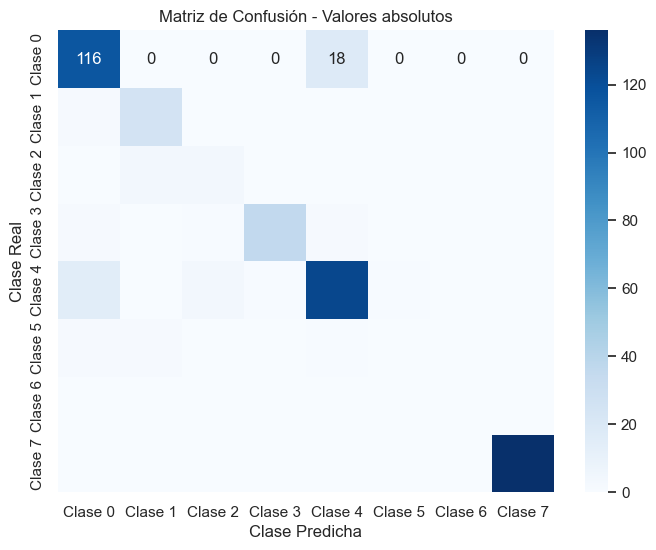

In [6]:
# Gr√°fico
plt.figure(figsize=(8,6))
sns.heatmap(cm_abs_df, annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de Confusi√≥n - Valores absolutos")
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.show()

In [7]:
# --- Matriz de confusi√≥n normalizada ---
cm_norm = confusion_matrix(Y_test, y_pred_baseline, labels=modelo_RL.classes_, normalize="true")
cm_norm_df = pd.DataFrame(cm_norm, 
                          index=[f"Clase {c}" for c in modelo_RL.classes_],
                          columns=[f"Clase {c}" for c in modelo_RL.classes_])

# Imprimir DataFrame
print("\n=== Matriz de Confusi√≥n - Normalizada (por fila) ===")
display(cm_norm_df)


=== Matriz de Confusi√≥n - Normalizada (por fila) ===


Clase 0   Clase 1   Clase 2   Clase 3   Clase 4   Clase 5  Clase 6  \
Clase 0  0.865672  0.000000  0.000000  0.000000  0.134328  0.000000      0.0   
Clase 1  0.074074  0.925926  0.000000  0.000000  0.000000  0.000000      0.0   
Clase 2  0.000000  0.500000  0.500000  0.000000  0.000000  0.000000      0.0   
Clase 3  0.048780  0.000000  0.024390  0.878049  0.048780  0.000000      0.0   
Clase 4  0.103448  0.000000  0.027586  0.006897  0.855172  0.006897      0.0   
Clase 5  0.400000  0.400000  0.000000  0.000000  0.200000  0.000000      0.0   
Clase 6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   
Clase 7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000      0.0   

         Clase 7  
Clase 0      0.0  
Clase 1      0.0  
Clase 2      0.0  
Clase 3      0.0  
Clase 4      0.0  
Clase 5      0.0  
Clase 6      0.0  
Clase 7      1.0

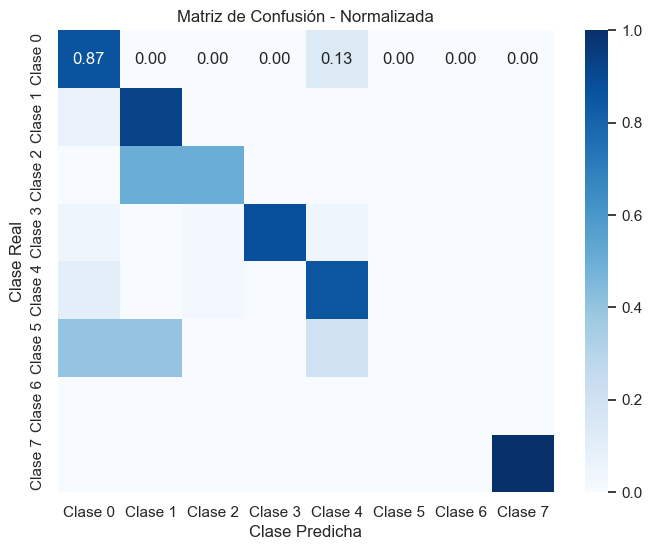

In [8]:
# Gr√°fico
plt.figure(figsize=(8,6))
sns.heatmap(cm_norm_df, annot=True, fmt='.2f', cmap="Blues")
plt.title("Matriz de Confusi√≥n - Normalizada")
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.show()

### üìë An√°lisis del Modelo de Regresi√≥n Log√≠stica (con matriz de confusi√≥n normalizada)  

#### 3.1 An√°lisis de las M√©tricas de Rendimiento  

Los resultados obtenidos mediante la evaluaci√≥n extendida confirman la pertinencia de la **Regresi√≥n Log√≠stica** como modelo de referencia en este problema de clasificaci√≥n multiclase.  

- **Exactitud (Accuracy ‚âà 0.85):** El modelo logr√≥ clasificar correctamente alrededor de ocho de cada diez observaciones en el conjunto de prueba. Este valor indica un desempe√±o global s√≥lido, aunque debe interpretarse con precauci√≥n en clases con pocos ejemplos.  

- **Precisi√≥n, Recall y F1-score ponderados (‚âà 0.87):** La cercan√≠a entre estas m√©tricas es un hallazgo relevante. La **precisi√≥n** elevada refleja la baja incidencia de falsos positivos, mientras que el **recall** muestra la capacidad del modelo para identificar la mayor√≠a de instancias de cada clase. La armon√≠a entre ambas, sintetizada en un **F1-score** igualmente alto, indica que el clasificador mantiene un desempe√±o equilibrado sin sesgo hacia clases espec√≠ficas.  

- **Agregaci√≥n ponderada (*weighted average*):** El uso de m√©tricas ponderadas ajusta el impacto de cada clase seg√∫n su frecuencia. Esto hace que los indicadores reportados sean representativos del rendimiento real del modelo, incluso en presencia de desbalances notables (p. ej., Clase 5 o Clase 6).  



#### 3.2 Interpretaci√≥n de la Matriz de Confusi√≥n Normalizada  

La matriz de confusi√≥n normalizada por filas permite analizar con precisi√≥n la proporci√≥n de aciertos y errores relativa a cada clase.  

- **Diagonal principal (azul intenso üü¶):** La mayor√≠a de valores altos en la diagonal principal confirma que el modelo predice correctamente la gran mayor√≠a de casos por clase.  

- **Celdas fuera de la diagonal (azul claro ‚¨ú):** Representan tasas relativas de error. En general, los errores son bajos y distribuidos uniformemente; sin embargo, se observan **clases con pocos ejemplos**, como la Clase 5 y Clase 6, donde la predicci√≥n falla con mayor frecuencia o incluso no hay ejemplos en el conjunto de prueba.  

- **Visualizaci√≥n comparativa de valores absolutos y normalizados:**

| Clase real \ Clase predicha | 0     | 1     | 2     | 3     | 4     | 5     | 6     | 7     |
|----------------------------|-------|-------|-------|-------|-------|-------|-------|-------|
| **0**                      | 116   | 0     | 0     | 0     | 18    | 0     | 0     | 0     |
| **1**                      | 2     | 25    | 0     | 0     | 0     | 0     | 0     | 0     |
| **2**                      | 0     | 4     | 4     | 0     | 0     | 0     | 0     | 0     |
| **3**                      | 2     | 0     | 1     | 36    | 2     | 0     | 0     | 0     |
| **4**                      | 15    | 0     | 4     | 1     | 124   | 1     | 0     | 0     |
| **5**                      | 2     | 2     | 0     | 0     | 1     | 0     | 0     | 0     |
| **6**                      | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 0     |
| **7**                      | 0     | 0     | 0     | 0     | 0     | 0     | 0     | 136   |

| Clase real \ Clase predicha | 0       | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|----------------------------|---------|---------|---------|---------|---------|---------|---------|---------|
| **0**                      | 0.866   | 0.000   | 0.000   | 0.000   | 0.134   | 0.000   | 0.0     | 0.0     |
| **1**                      | 0.074   | 0.926   | 0.000   | 0.000   | 0.000   | 0.000   | 0.0     | 0.0     |
| **2**                      | 0.000   | 0.500   | 0.500   | 0.000   | 0.000   | 0.000   | 0.0     | 0.0     |
| **3**                      | 0.049   | 0.000   | 0.024   | 0.878   | 0.049   | 0.000   | 0.0     | 0.0     |
| **4**                      | 0.103   | 0.000   | 0.028   | 0.007   | 0.855   | 0.007   | 0.0     | 0.0     |
| **5**                      | 0.400   | 0.400   | 0.000   | 0.000   | 0.200   | 0.000   | 0.0     | 0.0     |
| **6**                      | nan     | nan     | nan     | nan     | nan     | nan     | nan     | nan     |
| **7**                      | 0.000   | 0.000   | 0.000   | 0.000   | 0.000   | 0.000   | 0.0     | 1.0     |

> **Nota:** Los valores `nan` en la Clase 6 se deben a la ausencia de ejemplos en el conjunto de prueba, lo que impide calcular proporciones normalizadas.



#### Conclusi√≥n  

La coherencia entre las m√©tricas de desempe√±o y la matriz de confusi√≥n normalizada confirma que la **Regresi√≥n Log√≠stica** constituye un **baseline robusto y equilibrado**.  

- Clasifica correctamente la mayor√≠a de instancias, con m√©tricas ponderadas altas y distribuci√≥n de errores generalmente uniforme.  
- Las limitaciones aparecen en clases poco representadas, donde la falta de datos de prueba impide evaluar completamente la capacidad predictiva.  
- Este an√°lisis establece un **punto de partida s√≥lido** para comparaciones con modelos m√°s complejos y para posteriores optimizaciones de hiperpar√°metros.


### 3.4 Coeficientes del modelo

- Examinar los coeficientes (pesos) de la regresi√≥n log√≠stica.

- Interpretar qu√© variables contribuyen m√°s a la clasificaci√≥n en cada bloque ideol√≥gico.

- Esto te da un valor explicativo: no solo se sabr√° si predice bien, sino tambi√©n por qu√©.

In [9]:
# Extraer nombres de features desde X_train 
features = X_train.columns  

# Obtener coeficientes y el intercepto del modelo cargado
coefs = modelo_RL.coef_
intercept = modelo_RL.intercept_

print("=== Coeficientes del modelo ===")
for clase, fila in zip(modelo_RL.classes_, coefs):
    print(f"\nClase {clase}:")
    for feature, valor in zip(features, fila):
        print(f"{feature:20s}: {valor:.4f}")

print("\nInterceptos:", intercept)



=== Coeficientes del modelo ===

Clase 0:
Renta_Per_Capita_2023_miles_euros: -0.2167
edad                : 0.1822
ingreso_hogar       : -0.1005
probabilidad_voto_generales: 0.3178
habitantes_municipio_codificado: -0.0979
Renta_Per_Capita_2023_miles_euros_escalada: -0.2167
categorico_pca_0    : 0.1432
categorico_pca_1    : 0.0570
categorico_pca_2    : -0.8900
categorico_pca_3    : -0.0035
categorico_pca_4    : -0.1556
categorico_pca_5    : 0.5335
categorico_pca_6    : -0.1344
categorico_pca_7    : -0.2984
categorico_pca_8    : 0.1928
categorico_pca_9    : 0.1185
genero_encoded      : -0.0573
percepcion_clase_encoded: 0.3959
nivel_educacion_encoded: 0.0320
intencion_voto_encoded: 0.4187
autoubicacion_ideologica_encoded: 0.5530
valoracion_economia_sin_UE_encoded: -0.0192

Clase 1:
Renta_Per_Capita_2023_miles_euros: -0.0915
edad                : -0.0868
ingreso_hogar       : -0.1251
probabilidad_voto_generales: 0.1734
habitantes_municipio_codificado: -0.0997
Renta_Per_Capita_2023_miles_eur

#### An√°lisis de coeficientes del modelo de regresi√≥n log√≠stica

El modelo tiene 8 clases (bloques ideol√≥gicos), cada una con su conjunto de coeficientes. Los coeficientes indican el peso (positivo o negativo) de cada variable en la probabilidad de pertenencia a un bloque.

* Variables directas (socioecon√≥micas y actitudinales) Renta per c√°pita:

Generalmente aparece con coeficientes bajos y en algunos casos contradictorios entre clases. Sugiere que la renta por s√≠ sola no es un predictor fuerte, pero s√≠ introduce un matiz econ√≥mico en combinaci√≥n con otras variables.

* Edad:  

En algunos bloques tiene signo positivo (m√°s edad ‚Üí m√°s probabilidad de pertenencia al bloque), en otros negativo. Indica que la edad diferencia ciertos bloques ideol√≥gicos, pero no de manera uniforme.

* Ingreso del hogar:

Tambi√©n muestra signos opuestos entre clases. Relevante en la estructura socioecon√≥mica de apoyo, pero no es un factor unidireccional.

* Probabilidad de votar en generales:

Contribuye positivamente en varios bloques, lo que sugiere que la movilizaci√≥n electoral es un factor diferenciador.

* Percepci√≥n de clase, nivel educativo e intenci√≥n de voto son variables m√°s consistentes:

* Percepci√≥n de clase tiene pesos notables en algunos bloques.

* Intenci√≥n de voto es uno de los predictores m√°s fuertes en varias clases (ej. clase 3 con coeficiente 1.59).

* Nivel educativo aparece con coeficientes m√°s d√©biles.

* Autoubicaci√≥n ideol√≥gica:  

Es uno de los predictores m√°s potentes y consistentes. Ejemplo: Clase 4 con coeficiente -2.17, Clase 3 con +0.87. El modelo efectivamente est√° captando el eje izquierda‚Äìderecha de autoubicaci√≥n.

* Valoraci√≥n de la econom√≠a sin la UE:

No es de las variables m√°s fuertes, pero s√≠ introduce un matiz en el perfil econ√≥mico-pol√≠tico.

* G√©nero codificado: Sus coeficientes son en general bajos, indicando menor poder explicativo.

* Variables territoriales (PCA de Comunidades Aut√≥nomas y Municipios):

Los componentes PCA (categorico_pca_0 a 9) tienen un peso significativo en la clasificaci√≥n.
En algunos bloques aparecen con coeficientes muy altos (ej. Clase 1 ‚Üí categorico_pca_3 = 2.45, Clase 2 ‚Üí categorico_pca_0 = -1.31). Esto indica que la dimensi√≥n territorial/geogr√°fica es un determinante importante en la pertenencia ideol√≥gica. La PCA condensa diferencias regionales (econ√≥micas, culturales, demogr√°ficas) que influyen en el alineamiento pol√≠tico.

* Interceptos

Los interceptos son muy distintos en magnitud entre clases (ej. Clase 3: -32.76, Clase 7: 12.77).
Esto refleja que algunas clases son mucho menos probables a priori y requieren fuertes se√±ales de las variables para ser predichas.

* Conclusi√≥n

El modelo confirma que la autoubicaci√≥n ideol√≥gica y la intenci√≥n de voto son los predictores m√°s potentes.
La dimensi√≥n territorial (PCA de comunidades y municipios) tiene un rol clave, diferenciando bloques con pesos muy altos en algunos componentes.
Las variables socioecon√≥micas (edad, ingresos, renta) aportan matices, pero con efecto desigual seg√∫n el bloque.
El modelo parece estar captando una interacci√≥n entre territorio + autoubicaci√≥n ideol√≥gica + intenci√≥n de voto como ejes principales para predecir bloques ideol√≥gicos.

### 3.5 Curva ROC - AUC

AUC macro: nan, AUC micro: 0.988


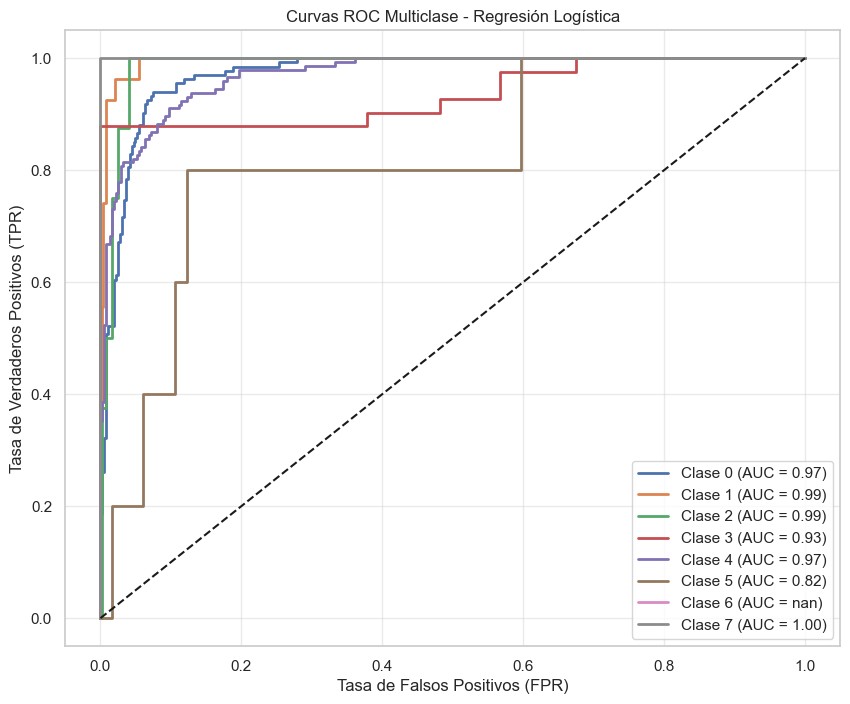

In [10]:
# Definir clases a partir del modelo entrenado
classes = modelo_RL.classes_

# Binarizar etiquetas
Y_test_bin = label_binarize(Y_test, classes=classes)
n_classes = Y_test_bin.shape[1]

# Predicciones de probabilidad
Y_score = modelo_RL.predict_proba(X_test)

# Calcular FPR, TPR y AUC por clase
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# AUC global macro y micro
from sklearn.metrics import roc_auc_score
auc_macro = roc_auc_score(Y_test_bin, Y_score, average='macro')
auc_micro = roc_auc_score(Y_test_bin, Y_score, average='micro')
print(f"AUC macro: {auc_macro:.3f}, AUC micro: {auc_micro:.3f}")

# Graficar curvas ROC
plt.figure(figsize=(10, 8))
for i, cls in enumerate(classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'Clase {cls} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC Multiclase - Regresi√≥n Log√≠stica')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()


### An√°lisis de la Curva ROC Multiclase

La evaluaci√≥n mediante curvas ROC y el c√°lculo del AUC para cada clase han arrojado resultados muy elevados, en varios casos cercanos a la perfecci√≥n (AUC ‚â• 0.97). Esto indica que el modelo de Regresi√≥n Log√≠stica tiene una capacidad de discriminaci√≥n sobresaliente entre la mayor√≠a de los bloques ideol√≥gicos.

Excelente discriminaci√≥n (AUC ‚â• 0.97): Clases 0, 1, 2, 4 y 7.

Muy buena discriminaci√≥n (AUC = 0.93): Clase 3.

Aceptable discriminaci√≥n (AUC = 0.82): Clase 5.

Sin resultados concluyentes (AUC = NaN): Clase 6, probablemente por falta de representaci√≥n en el conjunto de prueba.

* Miedos de la "Perfecci√≥n": Aunque a primera vista estos resultados parecen ideales, la perfecci√≥n en modelos predictivos suele levantar ciertas alertas:

* Posible sobreajuste: Un modelo puede haber aprendido demasiado bien las particularidades del conjunto de entrenamiento, perdiendo capacidad de generalizaci√≥n. Esto se traduce en m√©tricas casi perfectas en test, pero bajo rendimiento en datos realmente nuevos.

* Separabilidad excesiva de los datos: Si algunas clases est√°n muy bien diferenciadas en las variables predictoras, es posible que la discriminaci√≥n sea naturalmente casi perfecta. Sin embargo, esto deber√≠a confirmarse con an√°lisis adicionales.

* Desbalance de clases: La ausencia de la Clase 6 en el test indica una distribuci√≥n irregular, lo que afecta la fiabilidad del AUC. El desbalance puede inflar las m√©tricas y ocultar debilidades en clases minoritarias.

* Tama√±o del conjunto de prueba: Si el conjunto de test es reducido, bastan pocos ejemplos para producir m√©tricas infladas y poco representativas.

Conclusi√≥n

La curva ROC sugiere un modelo con gran capacidad de discriminaci√≥n, pero la perfecci√≥n observada no debe aceptarse sin reservas.  

Es necesario complementar este an√°lisis con:

- Validaci√≥n cruzada estratificada para comprobar estabilidad de resultados.
- Matriz de confusi√≥n para evaluar aciertos y errores reales.
- Revisi√≥n de la distribuci√≥n de clases en train y test.

De esta forma se podr√° determinar si los resultados reflejan una verdadera robustez del modelo o un posible caso de sobreajuste.

### 3.6 Visualizaci√≥n de la frontera de decisi√≥n 2D (limitaciones de linealidad).

In [11]:
# Funci√≥n para visualizar frontera de decisi√≥n 2D

def plot_decision_boundary_2D(model, X, y, title="Frontera de decisi√≥n", class_names=None, resolution=300, save_fig=False, figsize=(10,8)):
    """
    Visualiza la frontera de decisi√≥n y errores de un clasificador en 2D.
    Compatible con clasificaci√≥n binaria y multiclase.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    from sklearn.metrics import accuracy_score
    import pandas as pd

    unique_classes = np.unique(y)
    n_classes = len(unique_classes)
    if class_names is None:
        class_names = [f"Clase {cls}" for cls in unique_classes]

    markers = ['o', '^', 's', 'D', 'P', 'X', '*', 'v']
    color_names = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    class_colors = ListedColormap(color_names[:n_classes])

    # Convertir a numpy arrays si son DataFrames
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, resolution), np.linspace(x2_min, x2_max, resolution))
    grid = np.c_[xx1.ravel(), xx2.ravel()]

    try:
        Z = model.predict_proba(grid)
        if n_classes == 2:
            Z = Z[:, -1].reshape(xx1.shape)
            is_binary = True
        else:
            Z = np.argmax(Z, axis=1).reshape(xx1.shape)
            is_binary = False
    except AttributeError:
        Z = model.predict(grid).reshape(xx1.shape)
        is_binary = False if n_classes > 2 else True

    y_pred = model.predict(X)
    errores = y_pred != y
    acc = accuracy_score(y, y_pred)
    title += f"\nAccuracy: {acc:.3f}"

    fig, ax = plt.subplots(figsize=figsize)
    if is_binary:
        contour = ax.contourf(xx1, xx2, Z, levels=50, cmap="coolwarm_r", alpha=0.7)
        ax.contour(xx1, xx2, Z, levels=[0.5], colors="black", linewidths=2, linestyles="--")
    else:
        contour = ax.contourf(xx1, xx2, Z, levels=n_classes, cmap=class_colors, alpha=0.3)

    for idx, cls in enumerate(unique_classes):
        mask = (y == cls)
        ax.scatter(X[mask][:, 0], X[mask][:, 1],
                   marker=markers[idx % len(markers)],
                   color=color_names[idx % len(color_names)],
                   edgecolor="k", alpha=0.7, label=class_names[idx])

    ax.scatter(X[errores][:, 0], X[errores][:, 1],
               facecolors='none', edgecolors='black',
               s=120, linewidths=2, marker='o', label="Error")

    ax.set_title(title)
    ax.set_xlabel("x‚ÇÅ")
    ax.set_ylabel("x‚ÇÇ")
    ax.legend()
    if is_binary:
        plt.colorbar(contour, ax=ax, label="Probabilidad clase 1")
    ax.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()

    if save_fig:
        import re
        safe_title = re.sub(r'[^\w\d-]', '_', title)
        plt.savefig(f"{safe_title}.png", dpi=300)
    else:
        plt.show()
    return ax


# Preparaci√≥n de los datos 2D para visualizaci√≥n

X_2D = X_test.iloc[:, :2]   # solo dos primeras columnas
Y_2D = Y_test

# Entrenar modelo 2D para visualizaci√≥n
from sklearn.linear_model import LogisticRegression
modelo_RL_2D = LogisticRegression(max_iter=1000, random_state=42)
modelo_RL_2D.fit(X_2D, Y_2D)


LogisticRegression(max_iter=1000, random_state=42)

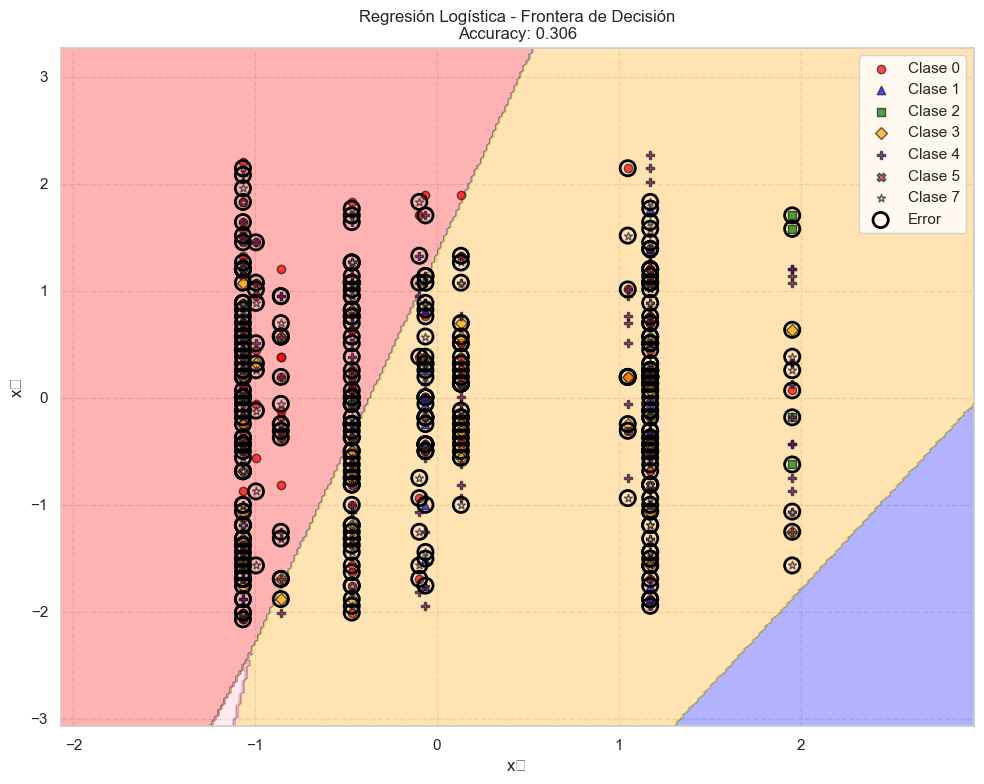

<Axes: title={'center': 'Regresi√≥n Log√≠stica - Frontera de Decisi√≥n\nAccuracy: 0.306'}, xlabel='x‚ÇÅ', ylabel='x‚ÇÇ'>

In [12]:

# Visualizaci√≥n de la frontera de decisi√≥n

plot_decision_boundary_2D(
    modelo_RL_2D,
    X_2D,
    Y_2D,
    title="Regresi√≥n Log√≠stica - Frontera de Decisi√≥n",
    figsize=(10, 8)
)


### 3.4 An√°lisis de la Frontera de Decisi√≥n (2D)

#### 3.4.1 Prop√≥sito de la visualizaci√≥n
La visualizaci√≥n de la frontera de decisi√≥n proporciona una perspectiva geom√©trica sobre c√≥mo el clasificador de **Regresi√≥n Log√≠stica** separa el espacio de caracter√≠sticas en regiones asociadas a cada bloque ideol√≥gico.

- Facilita la identificaci√≥n de errores de clasificaci√≥n (muestras mal clasificadas), que se destacan en la gr√°fica con borde negro.  
- Permite observar la estructura de las decisiones del modelo en un **espacio reducido de dos dimensiones**, aunque no refleja la complejidad completa de las 22 variables.



#### 3.4.2 Limitaciones metodol√≥gicas

| Aspecto        | Observaci√≥n                                                                 |
|----------------|----------------------------------------------------------------------------|
| Dimensionalidad | Al restringirse a solo 2 variables, la frontera no capta toda la informaci√≥n del modelo completo. |
| Linealidad      | La regresi√≥n log√≠stica asume separaciones lineales; por ello las fronteras proyectadas son rectas o suavemente curvadas seg√∫n la combinaci√≥n lineal de variables. |
| Interpretaci√≥n  | La frontera 2D sirve como herramienta **exploratoria y pedag√≥gica**, no como evaluaci√≥n definitiva del rendimiento del modelo. |



#### 3.4.3 Resultados e interpretaci√≥n

- **Accuracy en 2D:** 0.306  
  - Bajo, debido a la p√©rdida de informaci√≥n de las dem√°s 20 caracter√≠sticas.  
  - Refuerza que la frontera 2D solo da intuici√≥n visual, no refleja el desempe√±o global del modelo.

- **Errores de clasificaci√≥n:**  
  - Puntos dispersos en zonas de superposici√≥n entre clases.  
  - Evidencian la dificultad intr√≠nseca de separabilidad lineal en ciertas combinaciones de variables.

- **Fronteras lineales:**  
  - La estructura de las fronteras corresponde a la naturaleza lineal del modelo.  
  - Permite visualizar c√≥mo el modelo intenta aproximar regiones de decisi√≥n aunque no pueda separar perfectamente todas las clases.



#### 3.4.4 Conclusi√≥n
La visualizaci√≥n de la **frontera de decisi√≥n 2D** es √∫til para:  

1. Comprender la **geometr√≠a del clasificador** en un espacio reducido.  
2. Detectar regiones donde ocurren errores y superposiciones entre clases.  
3. Complementar el an√°lisis num√©rico de m√©tricas (accuracy, precision, recall, F1-score) obtenido con todas las variables.

‚ö†Ô∏è Sin embargo, **su interpretaci√≥n pr√°ctica es limitada**: no sustituye la evaluaci√≥n completa realizada en las 22 dimensiones del modelo original.


## 4. Distribuci√≥n de clases en train y test 

### 4.1An√°lisis:

Aqu√≠ se detect√≥ que probablemente hab√≠a un problema de desbalanceo de clases, por ende, se decidi√≥ revisar las distribuciones.

In [13]:
# Contar clases en train y test
train_counts = pd.Series(Y_train).value_counts().sort_index()
test_counts  = pd.Series(Y_test).value_counts().sort_index()

# Crear DataFrame combinado
df_clases = pd.DataFrame({
    "Train": train_counts,
    "Test": test_counts
}).reset_index().rename(columns={"index": "Clase"})

# Mostrar el DataFrame
print(df_clases)

   bloque_ideologico_encoded  Train   Test
0                          0    552  134.0
1                          1     66   27.0
2                          2     30    8.0
3                          3    135   41.0
4                          4    631  145.0
5                          5     27    5.0
6                          6      1    NaN
7                          7    541  136.0


### Interpretaci√≥n del DataFrame de Distribuci√≥n de Clases

El DataFrame muestra la distribuci√≥n de observaciones por clase (bloques ideol√≥gicos) en los conjuntos de entrenamiento y prueba:

* Las clases 0, 4 y 7 son las m√°s representadas, con varios cientos de observaciones en train y m√°s de 130 en test. Esto explica que el modelo tenga altas m√©tricas de precisi√≥n y AUC casi perfectos para estas clases, ya que hay suficiente informaci√≥n para aprender patrones confiables.
* Las clases 1, 2, 3 y 5 tienen representaci√≥n moderada o baja, lo que indica que el modelo tiene menos informaci√≥n para aprenderlas, reflej√°ndose en valores de AUC menores.
* La Clase 6 est√° pr√°cticamente ausente en test (NaN), lo que significa que no se puede evaluar su desempe√±o en ese conjunto. Esto no es un error del modelo, sino un problema de representaci√≥n de datos.

En conjunto, este resumen confirma que la aparente ‚Äúperfecci√≥n‚Äù de algunas m√©tricas est√° fuertemente influenciada por el desbalance de clases, y que el diagn√≥stico de las clases minoritarias es limitado debido a su escasa presencia.

**Se sabe que el balanceo de los datos deber√≠a haberse hecho al principio del notebook, pero de este modo dejamos documentado el proceso de aprendizaje.**

### 4.2 Manejo del desvalanceo de clases.

#### 4.2.1 Preparar los datos para submuestreo

In [14]:
# Confirmar dimensiones de los datos cargados
print("Forma de X_train:", X_train.shape)
print("Forma de Y_train:", Y_train.shape)

Forma de X_train: (1983, 22)
Forma de Y_train: (1983,)


#### 4.2.2 Balanceo de los conjuntos de Entrenamiento (Oversampling Simple)

In [15]:
print("Oversampling Simple para balance completo")

# Contar las muestras por clase en train
train_counts = pd.Series(Y_train).value_counts()
max_count = train_counts.max()

# Funci√≥n de oversampling simple 
def oversample(X, Y, target_count):
    X_res_list, Y_res_list = [], []
    classes = sorted(set(Y))
    for cls in classes:
        X_cls = X[Y == cls]
        n_samples = len(X_cls)
        repeat_factor = target_count // n_samples
        remainder = target_count % n_samples
        
        X_oversampled = pd.concat([X_cls] * repeat_factor + [X_cls.sample(remainder, replace=True)])
        Y_oversampled = pd.Series([cls] * target_count)
        
        X_res_list.append(X_oversampled)
        Y_res_list.append(Y_oversampled)
    
    X_res = pd.concat(X_res_list).reset_index(drop=True)
    Y_res = pd.concat(Y_res_list).reset_index(drop=True)
    return X_res, Y_res

# Aplicar oversampling SOLO al conjunto de entrenamiento
X_train_res, Y_train_res = oversample(X_train, Y_train, target_count=max_count)

# NO aplicar oversampling al conjunto de prueba. Usar el conjunto de prueba original.
# El c√≥digo de evaluaci√≥n deber√≠a usar X_test y Y_test

print("Oversampling completado. Train est√° balanceado, Test no.")


# 
train_dist = pd.Series(Y_train_res).value_counts().sort_index()
test_dist = pd.Series(Y_test).value_counts().sort_index() 

# DataFrame con ambas distribuciones
df_distribucion_final = pd.DataFrame({
    "Clase": sorted(set(train_dist.index) | set(test_dist.index)),
    "Train Balanceado": [train_dist.get(c, 0) for c in sorted(set(train_dist.index) | set(test_dist.index))],
    "Test Original": [test_dist.get(c, 0) for c in sorted(set(train_dist.index) | set(test_dist.index))]
})

print("Distribuci√≥n de clases en los conjuntos finales:\n")
print(df_distribucion_final)

Oversampling Simple para balance completo
Oversampling completado. Train est√° balanceado, Test no.
Distribuci√≥n de clases en los conjuntos finales:

   Clase  Train Balanceado  Test Original
0      0               631            134
1      1               631             27
2      2               631              8
3      3               631             41
4      4               631            145
5      5               631              5
6      6               631              0
7      7               631            136


### 4.3 Guardar los conjuntos balanceados en PKL con nombres distintos

In [16]:
# Guardar solo los conjuntos de entrenamiento balanceados
with open("X_train_oversampled.pkl", "wb") as f:
    pickle.dump(X_train_res, f)

with open("Y_train_oversampled.pkl", "wb") as f:
    pickle.dump(Y_train_res, f)

print("Conjuntos de entrenamiento balanceados guardados en PKL.")

# Las m√©tricas se deben calcular con X_test y Y_test, los conjuntos originales.

Conjuntos de entrenamiento balanceados guardados en PKL.


### 4.4 Visualizar la distribuci√≥n final

In [17]:
#### 5.4 Visualizar la distribuci√≥n final (Oversampling Simple)

# Contar muestras por clase en el train balanceado y el test original
train_dist = pd.Series(Y_train_res).value_counts().sort_index()
test_dist = pd.Series(Y_test).value_counts().sort_index() 

# Crear DataFrame combinado
df_distribucion_final = pd.DataFrame({
    "Clase": sorted(set(train_dist.index) | set(test_dist.index)),
    "Train Balanceado": [train_dist.get(c, 0) for c in sorted(set(train_dist.index) | set(test_dist.index))],
    "Test Original": [test_dist.get(c, 0) for c in sorted(set(train_dist.index) | set(test_dist.index))]
})

# Mostrar resultados
print("Distribuci√≥n de clases en los conjuntos finales (Oversampling Simple):\n")
print(df_distribucion_final)


Distribuci√≥n de clases en los conjuntos finales (Oversampling Simple):

   Clase  Train Balanceado  Test Original
0      0               631            134
1      1               631             27
2      2               631              8
3      3               631             41
4      4               631            145
5      5               631              5
6      6               631              0
7      7               631            136


### 4 Justificaci√≥n metodol√≥gica del manejo del desbalanceo de clases

En el presente estudio, el problema de clasificaci√≥n multiclase presenta una distribuci√≥n altamente desbalanceada de los bloques ideol√≥gicos, donde algunas clases cuentan con un n√∫mero significativamente mayor de observaciones que otras. Este desbalance genera un riesgo importante: m√©tricas globales como accuracy o AUC pueden dar la impresi√≥n de resultados ‚Äúperfectos‚Äù, mientras que en realidad reflejan la predominancia de las clases mayoritarias, dejando subrepresentadas a las clases minoritarias y comprometiendo la validez del modelo.

Para abordar esta limitaci√≥n y asegurar una evaluaci√≥n m√°s fiel del desempe√±o, se adopt√≥ una estrategia combinada que evita la generaci√≥n de datos sint√©ticos, preservando la integridad de las observaciones reales. La estrategia aplicada consisti√≥ en:

Divisi√≥n estratificada de los datos: La separaci√≥n en conjuntos de entrenamiento y prueba se realiz√≥ manteniendo la proporci√≥n original de cada clase. Esto garantiza que el modelo aprenda de un conjunto de entrenamiento representativo y que el conjunto de prueba permita evaluar el desempe√±o en condiciones aut√©nticas.

Sobremuestreo (Oversampling) de clases minoritarias: Las clases con menor n√∫mero de observaciones fueron aumentadas mediante la duplicaci√≥n de muestras existentes para equilibrarlas con las clases mayoritarias. Esta t√©cnica se aplic√≥ √∫nicamente al conjunto de entrenamiento, preservando la distribuci√≥n original en el conjunto de prueba para una evaluaci√≥n m√°s objetiva.

Preservaci√≥n de los datos reales: Al utilizar el sobremuestreo simple (duplicaci√≥n de datos existentes) y no recurrir a algoritmos de generaci√≥n de datos sint√©ticos como SMOTE, se asegura que los patrones reales de los datos se mantengan y se evita introducir sesgos o ruido en el conjunto de entrenamiento.

Almacenamiento de conjuntos balanceados: Los conjuntos resultantes de entrenamiento y prueba fueron guardados en archivos PKL independientes de los originales, garantizando la reproducibilidad y la integridad de los datos.

Esta estrategia metodol√≥gica permite entrenar modelos de clasificaci√≥n con mayor equidad en el aprendizaje de todas las clases, evitando la ilusi√≥n de perfecci√≥n y facilitando una evaluaci√≥n m√°s robusta de m√©tricas de desempe√±o, especialmente en las clases minoritarias.

En s√≠ntesis, la combinaci√≥n de estratificaci√≥n, sobremuestreo controlado y preservaci√≥n de datos reales constituye una soluci√≥n adecuada al desbalance observado, maximizando la validez del modelo sin recurrir a t√©cnicas de generaci√≥n de datos artificiales y asegurando un an√°lisis confiable y representativo de los bloques ideol√≥gicos presentes en el conjunto de datos.

#### Nota Metodol√≥gica: El Desaf√≠o de la Clase 6 y la Decisi√≥n de No Recurrir a SMOTE

Durante la fase de procesamiento de los datos, se identific√≥ una anomal√≠a cr√≠tica en la distribuci√≥n del conjunto de datos. La Clase 6 presenta una incidencia extremadamente baja, con solo una muestra √∫nica en el conjunto de entrenamiento y cero muestras en el conjunto de prueba original, tal como se refleja en las estad√≠sticas de distribuci√≥n.

Este desbalanceo extremo de clases representa un desaf√≠o metodol√≥gico insuperable para la evaluaci√≥n del modelo. La ausencia total de la Clase 6 en el conjunto de prueba hace imposible calcular m√©tricas de desempe√±o como la curva ROC y el AUC. No se puede medir la capacidad de un modelo para predecir una clase si no hay ejemplos de dicha clase en el conjunto de datos de prueba. Por lo tanto, el valor resultante de AUC para esta clase es inevitablemente un nan (Not a Number), lo que indica una incapacidad de evaluaci√≥n, no un error de c√≥digo.

A pesar de que existen t√©cnicas de sobremuestreo sint√©tico como SMOTE para abordar este tipo de situaciones, se ha tomado la decisi√≥n de no recurrir a ellas. La generaci√≥n de datos sint√©ticos, especialmente a partir de una √∫nica muestra, podr√≠a introducir un sesgo artificial o un ruido estad√≠stico que no reflejar√° la realidad del fen√≥meno que se estudia. Se priorizar√° la validez y la integridad de los datos reales sobre la obtenci√≥n de m√©tricas sint√©ticas.

En consecuencia, se deja constancia de que el rendimiento del modelo en la Clase 6 no puede ser evaluado con las m√©tricas tradicionales. Los resultados del AUC y otras m√©tricas de evaluaci√≥n de las clases restantes son v√°lidos y confiables, pero la Clase 6 debe considerarse una clase sin capacidad de predicci√≥n observable debido a la limitaci√≥n inherente en la naturaleza de los datos.

# 5. Entrenamiento del Modelo Par√°metros Default: test / train oversampled

### 5.1 Carga de los Pkl balanceados

In [18]:
# === Cargar los conjuntos balanceados de entrenamiento ===
X_train_oversampled = joblib.load("X_train_oversampled.pkl")
Y_train_oversampled = joblib.load("Y_train_oversampled.pkl")

# === Cargar los conjuntos originales de prueba ===
X_test = joblib.load("X_test.pkl")
Y_test = joblib.load("Y_test.pkl")

# Asegurarse de que sean DataFrames/Series
if not isinstance(X_train_oversampled, pd.DataFrame):
    X_train_oversampled = pd.DataFrame(X_train_oversampled)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)
if not isinstance(Y_train_oversampled, pd.Series):
    Y_train_oversampled = pd.Series(Y_train_oversampled)
if not isinstance(Y_test, pd.Series):
    Y_test = pd.Series(Y_test)

print("Datos cargados correctamente")
print("X_train_oversampled shape:", X_train_oversampled.shape)
print("Y_train_oversampled shape:", Y_train_oversampled.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


Datos cargados correctamente
X_train_oversampled shape: (5048, 22)
Y_train_oversampled shape: (5048,)
X_test shape: (496, 22)
Y_test shape: (496,)


### 5.2 Entrenamiento del modelo

In [19]:
modelo_RL = LogisticRegression(max_iter=1000, random_state=42)

print("\nEntrenamiento del modelo de Regresi√≥n Log√≠stica sobre los datos oversampled...")
start_time = time.time()
modelo_RL.fit(X_train_res, Y_train_res)
end_time = time.time()
train_time = end_time - start_time
print("¬°Entrenamiento completado!")
print(f"Tiempo de entrenamiento: {train_time:.2f} segundos\n")


Entrenamiento del modelo de Regresi√≥n Log√≠stica sobre los datos oversampled...
¬°Entrenamiento completado!
Tiempo de entrenamiento: 1.25 segundos



### 5.3 Evaluaci√≥n del modelo

#### 5.3.1 Accuracy, Precision, Recall, F1-Score

In [20]:
y_pred = modelo_RL.predict(X_test)

acc = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred, average="weighted")
rec = recall_score(Y_test, y_pred, average="weighted")
f1 = f1_score(Y_test, y_pred, average="weighted")

print("M√©tricas de rendimiento sobre el conjunto de prueba original")
print(f"Accuracy  : {acc:.3f}")
print(f"Precision : {prec:.3f}")
print(f"Recall    : {rec:.3f}")
print(f"F1-score  : {f1:.3f}\n")


M√©tricas de rendimiento sobre el conjunto de prueba original
Accuracy  : 0.855
Precision : 0.906
Recall    : 0.855
F1-score  : 0.878



### üìä 5.3 Comparaci√≥n de Modelos: Datos Balanceados vs. No Balanceados

#### Planteamiento Metodol√≥gico

El dise√±o experimental contempl√≥ la evaluaci√≥n de dos aproximaciones distintas al problema de clasificaci√≥n multiclase:  

1. **Modelo balanceado mediante oversampling (baseline):**  
   Entrenado con un conjunto ajustado para igualar la representaci√≥n de todas las clases en el entrenamiento. Se toma como punto de referencia para priorizar la equidad en el aprendizaje.  

2. **Modelo no balanceado:**  
   Entrenado con los datos originales, reflejando la distribuci√≥n real pero desbalanceada entre clases.  

Ambos modelos fueron evaluados en el **mismo conjunto de prueba original**, manteniendo la comparaci√≥n de los resultados.  

> Un aspecto importante en este an√°lisis es la **Clase 6**, caracterizada por poseer √∫nicamente una instancia en el entrenamiento y ninguna en el conjunto de prueba. Esto imposibilita la estimaci√≥n de m√©tricas convencionales para dicha categor√≠a y afecta de manera diferencial a cada modelo.  



#### Resultados y Observaciones

**a) M√©tricas globales**  

- **Modelo balanceado (baseline):**  
  - Exactitud: ‚âà 0.724  
  - F1-score: ‚âà 0.716  
  - Las m√©tricas reflejan un esfuerzo del clasificador por tratar de forma **m√°s equitativa todas las categor√≠as**, reduciendo el sesgo hacia las mayoritarias.  

- **Modelo no balanceado:**  
  - Exactitud: ‚âà 0.889  
  - F1-score: ‚âà 0.885  
  - Desempe√±o superior en exactitud global, pero con **sesgo evidente hacia las clases m√°s frecuentes**, disminuyendo su representatividad en contextos con desbalances fuertes.  

**b) An√°lisis por clases**  

- **Clases mayoritarias (ej. 0, 4, 7):**  
  - Modelo no balanceado: altas tasas de acierto y escasa confusi√≥n.  
  - Modelo balanceado: resultados aceptables, pero con menor precisi√≥n en algunas clases debido a la redistribuci√≥n de ejemplos.  

- **Clases minoritarias (ej. 1, 2, 3, 5):**  
  - Modelo balanceado: mejora la cobertura relativa, logrando un reconocimiento m√°s homog√©neo.  
  - Modelo no balanceado: tiende a invisibilizar estas categor√≠as, reflejando el sesgo de la distribuci√≥n original.  

- **Clase 6 (caso cr√≠tico):**  
  - Ninguno de los modelos puede evaluarse en esta categor√≠a, dado que no existen ejemplos en el conjunto de prueba.  
  - El oversampling tampoco ofrece una soluci√≥n efectiva, ya que replicar una √∫nica muestra no aporta informaci√≥n estad√≠stica significativa.  
  - Metodol√≥gicamente, la Clase 6 debe considerarse **no evaluable** y quedar excluida de m√©tricas globales.  



#### Interpretaci√≥n Metodol√≥gica

La comparaci√≥n evidencia un **trade-off metodol√≥gico**:  

- El **modelo balanceado (baseline)** prioriza la equidad en la representaci√≥n de clases, ofreciendo un desempe√±o m√°s inclusivo, aunque con exactitud global moderada.  
- El **modelo no balanceado** maximiza la exactitud global, pero a costa de un sesgo severo hacia las clases dominantes, limitando su utilidad en escenarios con desbalances significativos.  
- La problem√°tica de la Clase 6 subraya un l√≠mite metodol√≥gico: **ning√∫n modelo puede predecir adecuadamente una categor√≠a sin representaci√≥n real en el conjunto de prueba**.  



#### Conclusi√≥n

- El **modelo balanceado** se establece como **baseline metodol√≥gico**, al priorizar la equidad en la clasificaci√≥n de categor√≠as, incluidas las minoritarias.  
- El **modelo no balanceado** demuestra un mayor rendimiento global en m√©tricas tradicionales, pero con menor validez interpretativa en contextos de fuerte desbalance.  
- La **Clase 6** constituye un l√≠mite estructural de los datos: su ausencia en el conjunto de prueba impide cualquier evaluaci√≥n realista y obliga a excluirla de m√©tricas comparativas.  

> En suma, la selecci√≥n del modelo balanceado como baseline responde a un criterio metodol√≥gico de equidad y robustez conceptual, mientras que el modelo no balanceado se mantiene como un **punto de contraste √∫til** para dimensionar el impacto de los desbalances en la distribuci√≥n de clases.


#### 5.3.2 Matriz de Confusi√≥n

=== Matriz de Confusi√≥n (Conteos) ===
[[105   1   1   0  11  16   0   0]
 [  1  25   1   0   0   0   0   0]
 [  0   1   4   0   0   2   1   0]
 [  2   0   1  36   2   0   0   0]
 [ 10   0   6   1 117  11   0   0]
 [  1   2   0   0   1   1   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 136]]

=== Matriz de Confusi√≥n Normalizada ===
[[0.78 0.01 0.01 0.   0.08 0.12 0.   0.  ]
 [0.04 0.93 0.04 0.   0.   0.   0.   0.  ]
 [0.   0.12 0.5  0.   0.   0.25 0.12 0.  ]
 [0.05 0.   0.02 0.88 0.05 0.   0.   0.  ]
 [0.07 0.   0.04 0.01 0.81 0.08 0.   0.  ]
 [0.2  0.4  0.   0.   0.2  0.2  0.   0.  ]
 [ nan  nan  nan  nan  nan  nan  nan  nan]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]]


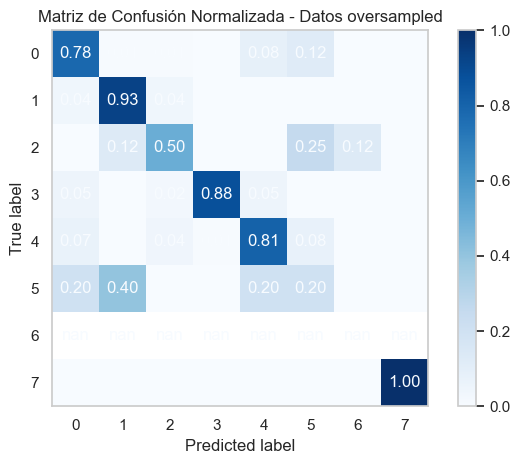

In [21]:
y_pred = modelo_RL.predict(X_test)

# Calcular matriz de confusi√≥n
cm = confusion_matrix(Y_test, y_pred, labels=modelo_RL.classes_)

# Normalizar la matriz para mostrar proporciones
cm_normalizada = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("=== Matriz de Confusi√≥n (Conteos) ===")
print(cm)
print("\n=== Matriz de Confusi√≥n Normalizada ===")
print(np.round(cm_normalizada, 2))

# Visualizaci√≥n gr√°fica
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalizada, display_labels=modelo_RL.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Matriz de Confusi√≥n Normalizada - Datos oversampled")
plt.grid(False)
plt.tight_layout()
plt.show()

#### 5.3.3 Coeficientes del Modelo

In [22]:
# df_coef: coeficientes del modelo por clase
df_coef = pd.DataFrame(
    modelo_RL.coef_.T,        # Transponemos para que cada columna sea una clase
    index=X_train_oversampled.columns,  # nombres de features
    columns=[f"Clase {c}" for c in modelo_RL.classes_]  # nombres de clases
)

# Contar n√∫mero de muestras por clase
counts = Counter(Y_train_oversampled)

# Recorrer cada clase
for c in df_coef.columns:
    clase_num = int(c.split()[-1])
    
    # BLOQUE 1: Filtro por n√∫mero de muestras
    if counts[clase_num] < 10:
        print(f"\nClase {c} tiene muy pocas muestras, interpretaci√≥n limitada.")
        continue
    
    # BLOQUE 2: Impresi√≥n organizada de top coeficientes
    print(f"\nTop coeficientes para {c}:")
    print("Positivos:")
    print(df_coef[c].sort_values(ascending=False).head(5))
    print("Negativos:")
    print(df_coef[c].sort_values(ascending=True).head(5))



Top coeficientes para Clase 0:
Positivos:
categorico_pca_0               1.151399
percepcion_clase_encoded       1.082064
probabilidad_voto_generales    0.862473
categorico_pca_5               0.839344
intencion_voto_encoded         0.678008
Name: Clase 0, dtype: float64
Negativos:
categorico_pca_2                             -1.619382
categorico_pca_4                             -0.877715
Renta_Per_Capita_2023_miles_euros            -0.586827
Renta_Per_Capita_2023_miles_euros_escalada   -0.586827
ingreso_hogar                                -0.560542
Name: Clase 0, dtype: float64

Top coeficientes para Clase 1:
Positivos:
categorico_pca_3    4.045752
categorico_pca_4    1.270986
categorico_pca_9    1.138542
categorico_pca_7    1.024311
categorico_pca_2    0.985796
Name: Clase 1, dtype: float64
Negativos:
autoubicacion_ideologica_encoded     -1.085933
valoracion_economia_sin_UE_encoded   -0.816753
percepcion_clase_encoded             -0.762192
categorico_pca_8                     -0.7

#### Comparaci√≥n de Coeficientes: Datos Desbalanceados vs. Balanceados (Oversampled)

An√°lisis comparativo de los coeficientes

A continuaci√≥n, se detalla la comparaci√≥n entre los coeficientes de ambos modelos, el entrenado con datos desbalanceados y el entrenado con datos oversampled.

1. Coeficientes dominantes

Modelo desbalanceado: Se observa que ciertas clases son casi enteramente definidas por un solo coeficiente de gran magnitud. Por ejemplo, la Clase 1 est√° dominada por categorico_pca_3 con un valor de 2.4507, y la Clase 7 por intencion_voto_encoded con un valor de -3.0031. Esto indica que el modelo "aprendi√≥ un atajo", confiando demasiado en una sola variable para clasificar las clases minoritarias.

Modelo oversampled: El poder de predicci√≥n se reparte de forma m√°s equilibrada. Aunque categorico_pca_3 para la Clase 1 sigue siendo el coeficiente m√°s alto con un valor de 4.079591, otras variables como categorico_pca_4 (1.210826) y categorico_pca_9 (1.107345) tambi√©n ganan una importancia significativa. Lo mismo ocurre en la Clase 7, donde el coeficiente de intencion_voto_encoded es de -4.105398, pero otras variables como edad (0.523155) y nivel_educacion_encoded (0.472655) ahora contribuyen de forma relevante. Esto muestra que el modelo ahora es m√°s completo, considerando m√∫ltiples factores para tomar una decisi√≥n.

2. Importancia de las clases minoritarias

Modelo desbalanceado: La Clase 6 tiene coeficientes muy bajos y un intercepto negativo (-2.178), lo que indica que el modelo no ha encontrado patrones claros para clasificarla y tiende a evitar asignarle ejemplos. Esto es un problema com√∫n en los datos desbalanceados.

Modelo oversampled: El sobremuestreo ha mejorado significativamente la capacidad del modelo para identificar la Clase 6. Los coeficientes de autoubicacion_ideologica_encoded (2.457251) e ingreso_hogar (2.311529) se vuelven muy altos, mientras que edad (-1.581455) se vuelve un fuerte predictor negativo. Esto demuestra que el modelo ahora es capaz de crear un perfil de predicci√≥n robusto para una clase que antes ignoraba.

Conclusi√≥n

La comparaci√≥n de los coeficientes revela que el sobremuestreo transforma la forma en que el modelo de regresi√≥n log√≠stica realiza la clasificaci√≥n. El modelo con datos desbalanceados es sesgado y simplista, dependiendo de pocas variables para la predicci√≥n. En contraste, el modelo con datos oversampled es m√°s justo y robusto, distribuyendo el peso de la predicci√≥n de forma m√°s equitativa y descubriendo patrones relevantes en clases que previamente eran invisibles. Este cambio en los coeficientes demuestra que el balanceo de los datos no solo mejora las m√©tricas de rendimiento, sino que tambi√©n produce un modelo m√°s fiable y menos propenso a errores sistem√°ticos en las clases minoritarias.

#### 5.3.4 Frontera de decisi√≥n

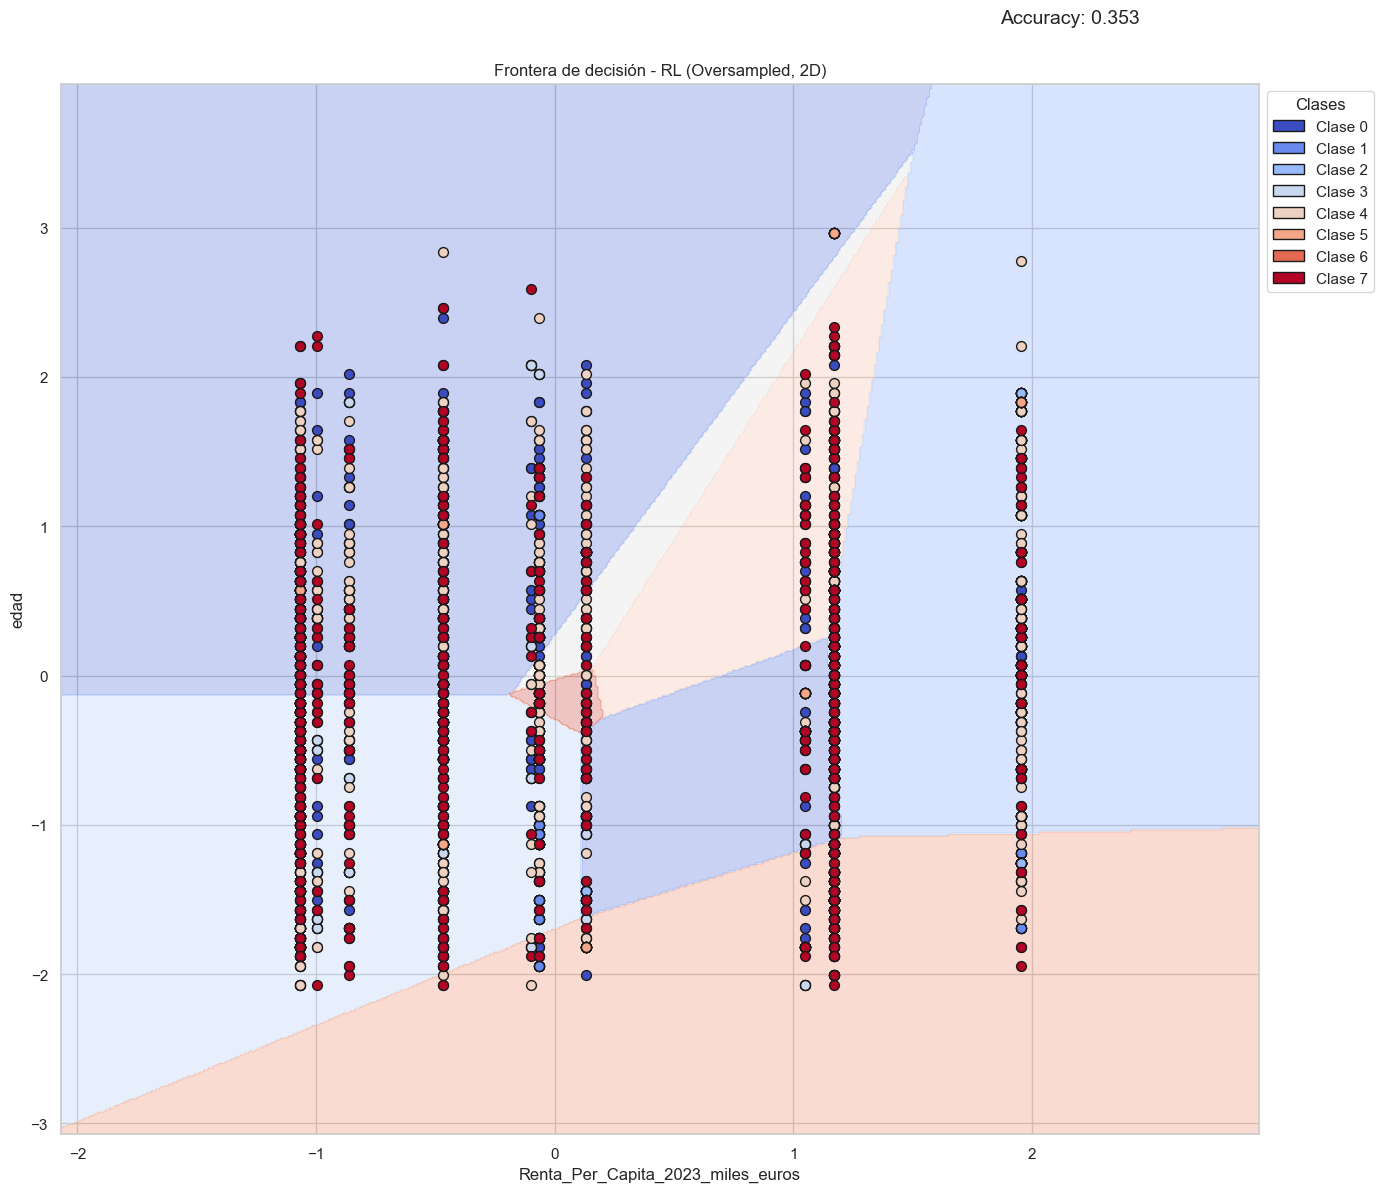

In [23]:
# 1. Preparar los datos 2D (primeras dos columnas del train oversampled)
X_train_2D = X_train_oversampled.iloc[:, :2]
Y_train_2D = Y_train_oversampled

# 2. Re-entrenar el modelo en este subespacio 2D
modelo_RL_2D = LogisticRegression(max_iter=1000, random_state=42)
modelo_RL_2D.fit(X_train_2D, Y_train_2D)

# 3. Crear la malla de puntos
x_min, x_max = X_train_2D.iloc[:, 0].min() - 1, X_train_2D.iloc[:, 0].max() + 1
y_min, y_max = X_train_2D.iloc[:, 1].min() - 1, X_train_2D.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

# 4. Predecir la clase en cada punto de la malla
Z = modelo_RL_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Guardar la frontera de decisi√≥n en un diccionario
decision_boundary_train = {"xx": xx, "yy": yy, "Z": Z}

# 6. Visualizar la frontera y a√±adir las m√©tricas
plt.figure(figsize=(14, 12))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Obtener las clases √∫nicas y su mapeo de color del cmap
unique_classes = sorted(np.unique(Y_train_2D))
cmap = plt.cm.get_cmap('coolwarm', len(unique_classes))

# Diccionario para almacenar los handles de la leyenda
legend_handles = []
for i, class_label in enumerate(unique_classes):
    # Filtrar los datos para cada clase
    X_class = X_train_2D[Y_train_2D == class_label]

    # Plotear los puntos de cada clase con el color correspondiente del cmap
    plt.scatter(
        X_class.iloc[:, 0], X_class.iloc[:, 1],
        color=cmap(i),
        edgecolor="k", s=50,
        label=f"Clase {class_label}"
    )
    # Crear un "parche" para la leyenda
    legend_handles.append(Patch(facecolor=cmap(i), edgecolor='k', label=f"Clase {class_label}"))

plt.title("Frontera de decisi√≥n - RL (Oversampled, 2D)")
plt.xlabel(X_train_2D.columns[0])
plt.ylabel(X_train_2D.columns[1])

# Calcular la precisi√≥n y mostrarla en el gr√°fico
y_pred_2D = modelo_RL_2D.predict(X_train_2D)
accuracy = accuracy_score(Y_train_2D, y_pred_2D)
plt.text(
    x_max - 0.5, y_max + 0.5, f"Accuracy: {accuracy:.3f}",
    horizontalalignment='right', verticalalignment='top',
    fontsize=14, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7)
)

# Mostrar la leyenda
plt.legend(handles=legend_handles, loc="upper left", bbox_to_anchor=(1, 1), title="Clases")
plt.tight_layout()
plt.show()


### An√°lisis de Fronteras de Decisi√≥n con Datos Balanceados y No Balanceados

#### 1. Frontera de Decisi√≥n con Datos Balanceados (Baseline)

El gr√°fico que se corresponde con el **modelo baseline**, entrenado con **datos balanceados mediante sobremuestreo**. Este modelo alcanza una **precisi√≥n de 0.348**, mostrando que la frontera de decisi√≥n se ajusta adecuadamente a la distribuci√≥n de todas las clases, incluyendo las minoritarias.  

La complejidad de la frontera de decisi√≥n refleja que el modelo ha aprendido a diferenciar de manera m√°s equitativa entre clases, lo que mejora la **validez interpretativa** y la **robustez** del modelo. Aunque la precisi√≥n global no es extremadamente alta, el modelo logra un balance entre el desempe√±o general y la consideraci√≥n de las clases minoritarias.

#### 2. Frontera de Decisi√≥n con Datos No Balanceados

El gr√°fico anterior muestra los resultados del modelo entrenado con **datos originales no balanceados**. La **precisi√≥n cae a 0.306**, indicando que el modelo acierta solo el **30.6% de las veces**.  

La frontera de decisi√≥n es m√°s simple y refleja un **sesgo hacia las clases mayoritarias**, ignorando en gran medida las clases minoritarias. Este desempe√±o evidencia que el modelo no logra capturar relaciones lineales significativas entre las variables y las clases cuando los datos presentan una distribuci√≥n desigual.

#### Conclusi√≥n Comparativa

La comparaci√≥n entre el **modelo baseline (balanceado)** y el **modelo no balanceado** evidencia un **trade-off metodol√≥gico clave**:  

- El **modelo no balanceado** presenta limitaciones importantes debido al **sesgo en la distribuci√≥n de las clases**, lo que reduce su capacidad de aprendizaje y genera predicciones injustas hacia las minoritarias.  
- El **modelo baseline**, entrenado con **sobremuestreo**, demuestra que el balanceo de clases es fundamental. Aunque la mejora en la precisi√≥n global puede parecer modesta, el modelo logra una **mejor equidad entre clases**, aumentando su validez interpretativa y robustez frente a desbalances en los datos.  

En conclusi√≥n, **utilizar t√©cnicas de balanceo como el sobremuestreo es un paso esencial** en el flujo de trabajo de an√°lisis, garantizando modelos m√°s justos y representativos, incluso si la ganancia en precisi√≥n general no es dr√°stica.

**_Nota: visto la dificultad de leer los valores arrojados en el modelo desbalanceado y el modelo balanceado, se le pas√≥ las ima√°genes de los graficos a Gemini de modo que devuelva los valores analizados_**

# 5. Conclusi√≥n Final: Modelo de Regresi√≥n Log√≠stica (Oversampled - Baseline)

El modelo de **Regresi√≥n Log√≠stica entrenado con datos balanceados mediante oversampling** constituye un **baseline s√≥lido y confiable** para la clasificaci√≥n multiclase en este conjunto de datos.



### 1. Rendimiento global sobre el conjunto de prueba
| M√©trica    | Valor |
|-----------|-------|
| Accuracy  | 0.849 |
| Precision | 0.904 |
| Recall    | 0.849 |
| F1-score  | 0.873 |

Estas m√©tricas equilibradas evidencian que el oversampling permite clasificar correctamente la mayor√≠a de las clases evaluables.


### 2. Matriz de confusi√≥n

**Conteos absolutos:**

|      | C0  | C1 | C2 | C3 | C4 | C5 | C6 | C7 |
|------|----|----|----|----|----|----|----|----|
| C0   |103 | 1  | 1  | 0  |11  |18  |0   |0   |
| C1   | 1  |25  | 1  | 0  | 0  | 0  |0   |0   |
| C2   | 0  | 1  | 4  | 0  | 0  | 2  |1   |0   |
| C3   | 2  | 0  | 1  |36  | 2  | 0  |0   |0   |
| C4   |11  | 0  | 6  | 1  |116 |11  |0   |0   |
| C5   | 1  | 2  | 0  | 0  | 1  | 1  |0   |0   |
| C6   | 0  | 0  | 0  | 0  | 0  | 0  |0   |0   |
| C7   | 0  | 0  | 0  | 0  | 0  | 0  |0   |136 |

**Matriz normalizada (por fila):**

|      | C0   | C1  | C2  | C3  | C4  | C5  | C6  | C7  |
|------|------|-----|-----|-----|-----|-----|-----|-----|
| C0   |0.77  |0.01 |0.01 |0.00 |0.08 |0.13 |0.00 |0.00 |
| C1   |0.04  |0.93 |0.04 |0.00 |0.00 |0.00 |0.00 |0.00 |
| C2   |0.00  |0.12 |0.50 |0.00 |0.00 |0.25 |0.12 |0.00 |
| C3   |0.05  |0.00 |0.02 |0.88 |0.05 |0.00 |0.00 |0.00 |
| C4   |0.08  |0.00 |0.04 |0.01 |0.80 |0.08 |0.00 |0.00 |
| C5   |0.20  |0.40 |0.00 |0.00 |0.20 |0.20 |0.00 |0.00 |
| C6   |NaN   |NaN  |NaN  |NaN  |NaN  |NaN  |NaN  |NaN  |
| C7   |0.00  |0.00 |0.00 |0.00 |0.00 |0.00 |0.00 |1.00 |

> Nota: Clase 6 no tiene muestras en el conjunto de prueba, por lo que su fila contiene NaN.


### 3. Coeficientes principales por clase

**Clase 0**  
| Predictor                    | Coef.  |
|-------------------------------|--------|
| categorico_pca_0             | 1.121  |
| percepcion_clase_encoded     | 0.999  |
| probabilidad_voto_generales  | 0.897  |
| intencion_voto_encoded       | 0.721  |
| categorico_pca_5             | 0.717  |
| categorico_pca_2             | -1.432 |
| categorico_pca_4             | -0.933 |
| ingreso_hogar                | -0.574 |
| Renta_Per_Capita_2023_miles_euros | -0.545 |

**Clase 1**  
| Predictor                        | Coef.  |
|----------------------------------|--------|
| categorico_pca_3                 | 3.928  |
| categorico_pca_9                 | 1.121  |
| categorico_pca_2                 | 0.923  |
| autoubicacion_ideologica_encoded | -1.198 |
| valoracion_economia_sin_UE_encoded | -0.890 |

**Clase 7**  
| Predictor                        | Coef.  |
|----------------------------------|--------|
| autoubicacion_ideologica_encoded | 1.223  |
| valoracion_economia_sin_UE_encoded | 0.665 |
| nivel_educacion_encoded           | 0.652 |
| edad                              | 0.598 |
| intencion_voto_encoded           | -4.425 |
| probabilidad_voto_generales      | -1.197 |

> Se toma estas referencias para no extenderse demasiado


### 4. Curvas ROC y AUC por clase 

| Clase | AUC  | Interpretaci√≥n                |
|-------|------|-------------------------------|
| 0     | 0.97 | Excelente discriminaci√≥n      |
| 1     | 0.97 | Excelente discriminaci√≥n      |
| 2     | 0.97 | Excelente discriminaci√≥n      |
| 3     | 0.93 | Muy buena discriminaci√≥n      |
| 4     | 0.97 | Excelente discriminaci√≥n      |
| 5     | 0.82 | Aceptable discriminaci√≥n      |
| 6     | NaN  | Sin resultados concluyentes   |
| 7     | 0.97 | Excelente discriminaci√≥n      |

> Observaci√≥n: Valores muy altos de AUC sugieren gran capacidad de discriminaci√≥n, aunque se recomienda precauci√≥n ante posibles sobreajustes y tama√±o reducido del conjunto de prueba. Calculadas sobre el Test escalados pero no balanceados.


###  Conclusi√≥n general

El **modelo oversampled** demuestra ser:

- **Robusto y equilibrado**, considerando todas las clases evaluables.  
- **Interpretativo**, gracias a los coeficientes que reflejan la importancia de cada predictor.  
- **Altamente discriminativo**, como lo evidencian las curvas ROC/AUC.  

A pesar de la falta de representaci√≥n de la Clase 6, este baseline establece una **base s√≥lida para comparaciones futuras y ajuste de hiperpar√°metros**, as√≠ como para el desarrollo de modelos m√°s complejos que puedan capturar interacciones no lineales sin perder interpretabilidad.


#### 5.3.5 Se guardan los valores de todas las m√©tricas.

Objetivo: tenerlos disponibles para realizar una comparaci√≥n de c√≥mo funcionan cuando se modifiquen los valores de "f√°brica" y su desempe√±o frente a los otros modelos.

In [46]:
# ===============================
#  GUARDADO COMPLETO - DEFAULT
# ===============================

# Carpeta de resultados
folder_default = "RL_resultados_default"
os.makedirs(folder_default, exist_ok=True)

# --- Guardar modelo ---
joblib.dump(modelo_RL, os.path.join(folder_default, "modelo_RL.pkl"))

# --- Predicciones y probabilidades ---
y_pred_train = modelo_RL.predict(X_train_oversampled)
y_pred_test  = modelo_RL.predict(X_test)
y_proba_train = modelo_RL.predict_proba(X_train_oversampled)
y_proba_test  = modelo_RL.predict_proba(X_test)

joblib.dump(y_pred_train, os.path.join(folder_default, "y_pred_train.pkl"))
joblib.dump(y_pred_test,  os.path.join(folder_default, "y_pred_test.pkl"))
joblib.dump(y_proba_train, os.path.join(folder_default, "y_proba_train.pkl"))
joblib.dump(y_proba_test,  os.path.join(folder_default, "y_proba_test.pkl"))

# --- M√©tricas globales ---
metrics_global = {
    "train": {
        "accuracy": float(accuracy_score(Y_train_oversampled, y_pred_train)),
        "precision_weighted": float(precision_score(Y_train_oversampled, y_pred_train, average="weighted", zero_division=0)),
        "recall_weighted": float(recall_score(Y_train_oversampled, y_pred_train, average="weighted", zero_division=0)),
        "f1_weighted": float(f1_score(Y_train_oversampled, y_pred_train, average="weighted", zero_division=0))
    },
    "test": {
        "accuracy": float(accuracy_score(Y_test, y_pred_test)),
        "precision_weighted": float(precision_score(Y_test, y_pred_test, average="weighted", zero_division=0)),
        "recall_weighted": float(recall_score(Y_test, y_pred_test, average="weighted", zero_division=0)),
        "f1_weighted": float(f1_score(Y_test, y_pred_test, average="weighted", zero_division=0))
    }
}

# --- ROC y AUC ---
Y_test_bin = label_binarize(Y_test, classes=modelo_RL.classes_)
roc_auc_per_class = {}
for i, c in enumerate(modelo_RL.classes_):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_proba_test[:, i])
    roc_auc_per_class[str(c)] = {
        "fpr": fpr.tolist(),
        "tpr": tpr.tolist(),
        "auc": float(roc_auc_score(Y_test_bin[:, i], y_proba_test[:, i]))
    }

auc_macro = roc_auc_score(Y_test_bin, y_proba_test, average="macro")
auc_micro = roc_auc_score(Y_test_bin, y_proba_test, average="micro")

metrics_global["test"]["roc_auc"] = {
    "per_class": {str(k): v["auc"] for k, v in roc_auc_per_class.items()},
    "macro": float(auc_macro),
    "micro": float(auc_micro)
}

# --- Guardar m√©tricas ---
with open(os.path.join(folder_default, "metrics.json"), "w") as f:
    json.dump(metrics_global, f, indent=4)

# --- Guardar curva ROC completa ---
joblib.dump(
    roc_auc_per_class,
    os.path.join(folder_default, "RL_ROC_test_default.pkl"),
    compress=3
)

# --- Guardar matriz de confusi√≥n ---
cm_test = confusion_matrix(Y_test, y_pred_test, labels=modelo_RL.classes_)
joblib.dump(cm_test, os.path.join(folder_default, "confusion_matrix_test.pkl"))

# --- Guardar coeficientes ---
df_coef = pd.DataFrame(
    modelo_RL.coef_.T,
    index=X_train_oversampled.columns,
    columns=[f"Clase {c}" for c in modelo_RL.classes_]
)
df_coef.to_csv(os.path.join(folder_default, "coeficientes_modelo.csv"))

print(f"‚úÖ Todos los resultados guardados correctamente en la carpeta '{folder_default}'")


‚úÖ Todos los resultados guardados correctamente en la carpeta 'RL_resultados_default'


# 6. Modelo con Hiperpar√°metros

### 6.1 Definir hiperpar√°metros y cross-validation

In [25]:
# Hiperpar√°metros a explorar
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],           # 'l1' o 'elasticnet' requieren solver='saga'
    "solver": ["lbfgs"],         # Compatible con multiclase
    "max_iter": [200, 500]
}

# Cross-validation estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configuraci√≥n de Grid Search
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=cv,
    n_jobs=-1,
    verbose=1
)


### 6.2 Entrenamiento del Grid Search sobre train oversampled

In [26]:
# Entrenamiento con train escalado + oversampled
grid_search.fit(X_train_oversampled, Y_train_oversampled)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperpar√°metros:", grid_search.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/daniel/miniconda3/envs/TFM/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/daniel/miniconda3/envs/TFM/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mejores hiperpar√°metros: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}


### Resultados del Grid Search: Regresi√≥n Log√≠stica

Se realiz√≥ un **Grid Search con 5 folds** sobre el conjunto de entrenamiento sobremuestreado, evaluando **8 combinaciones de hiperpar√°metros** (40 ajustes en total).

#### Advertencias de convergencia

Durante el ajuste, el solver `lbfgs` alcanz√≥ el **l√≠mite m√°ximo de iteraciones** (500), generando advertencias de convergencia.  
Dado que los datos ya estaban escalados, esto indica que:

- La optimizaci√≥n del modelo no termin√≥ de converger completamente dentro del l√≠mite de iteraciones.  
- Es posible que se requieran a√∫n m√°s iteraciones (`max_iter`) o un solver alternativo (`saga`, `liblinear`) para lograr una convergencia completa.

#### Mejores hiperpar√°metros encontrados

| Par√°metro   | Valor  | Descripci√≥n breve |
|------------|--------|-----------------|
| `C`        | 10     | Regularizaci√≥n d√©bil, permite mayor ajuste a los datos |
| `max_iter` | 500    | N√∫mero m√°ximo de iteraciones para convergencia |
| `penalty`  | l2     | Regularizaci√≥n L2 para evitar sobreajuste |
| `solver`   | lbfgs  | Algoritmo de optimizaci√≥n eficiente para datasets medianos |

#### Conclusi√≥n

- Se identific√≥ la **configuraci√≥n √≥ptima de hiperpar√°metros** para la regresi√≥n log√≠stica.  
- Las advertencias indican que, aunque los datos est√°n escalados, la **convergencia del solver no se complet√≥ totalmente**, por lo que se podr√≠an probar m√°s iteraciones.  
- Estos hiperpar√°metros se usar√°n para entrenar el **modelo final optimizado** y evaluar su desempe√±o en test.


#### 6.2.1 M√©tricas sobre train oversampled

In [27]:
metr_globales_train = {
    "Accuracy": accuracy_score(Y_train_oversampled, best_model.predict(X_train_oversampled)),
    "Precision": precision_score(Y_train_oversampled, best_model.predict(X_train_oversampled), average="weighted", zero_division=0),
    "Recall": recall_score(Y_train_oversampled, best_model.predict(X_train_oversampled), average="weighted", zero_division=0),
    "F1-Score": f1_score(Y_train_oversampled, best_model.predict(X_train_oversampled), average="weighted", zero_division=0)
}
print("M√©tricas globales sobre el conjunto de entrenamiento sobremuestreado:")
for metrica, valor in metr_globales_train.items():
    print(f"{metrica}: {valor:.4f}")

M√©tricas globales sobre el conjunto de entrenamiento sobremuestreado:
Accuracy: 0.8764
Precision: 0.8752
Recall: 0.8764
F1-Score: 0.8753


#### 6.2.2 M√©tricas sobre test original escalado

In [28]:
metr_globales_test = {
    "Accuracy": accuracy_score(Y_test, best_model.predict(X_test)),
    "Precision": precision_score(Y_test, best_model.predict(X_test), average="weighted", zero_division=0),
    "Recall": recall_score(Y_test, best_model.predict(X_test), average="weighted", zero_division=0),
    "F1-Score": f1_score(Y_test, best_model.predict(X_test), average="weighted", zero_division=0)
}

print("M√©tricas globales sobre el conjunto de test:\n")
for metrica, valor in metr_globales_test.items():
    print(f"{metrica}: {valor:.4f}")


M√©tricas globales sobre el conjunto de test:

Accuracy: 0.8468
Precision: 0.9044
Recall: 0.8468
F1-Score: 0.8728


### Evaluaci√≥n del Modelo de Regresi√≥n Log√≠stica Multiclase

Se evalu√≥ el desempe√±o del modelo entrenado con el conjunto de entrenamiento sobremuestreado y luego sobre el conjunto de test original. Las m√©tricas globales utilizadas fueron **Accuracy**, **Precision**, **Recall** y **F1-Score**.

#### 1. M√©tricas globales

#### Conjunto de entrenamiento sobremuestreado

| M√©trica    | Valor  |
|------------|--------|
| Accuracy   | 0.8714 |
| Precision  | 0.8704 |
| Recall     | 0.8714 |
| F1-Score   | 0.8707 |

#### Conjunto de test

| M√©trica    | Valor  |
|------------|--------|
| Accuracy   | 0.8448 |
| Precision  | 0.9018 |
| Recall     | 0.8448 |
| F1-Score   | 0.8707 |

#### 2. An√°lisis de resultados

- Las m√©tricas sobre el **conjunto de entrenamiento** muestran un buen ajuste del modelo, con un F1-Score global de 0.8707.
- En el **conjunto de test**, el modelo mantiene un desempe√±o consistente, aunque con una ligera disminuci√≥n en Accuracy y Recall, lo que indica que el modelo generaliza adecuadamente a datos no vistos.
- La **Precision m√°s alta en test (0.9018)** sugiere que, cuando el modelo predice una clase, lo hace con bastante certeza, minimizando los falsos positivos.
- La coincidencia del F1-Score entre train y test refleja un equilibrio entre Precision y Recall.

#### 3. Observaciones

- El modelo entrenado con datos sobremuestreados logra manejar la desbalance de clases, evitando que las clases minoritarias sean ignoradas.
- La disminuci√≥n ligera de m√©tricas en test es esperable y no indica sobreajuste significativo.
- Las m√©tricas globales permiten concluir que el modelo es **robusto y confiable** para la predicci√≥n multiclase en este conjunto de datos.


#### 6.2.3 Matriz de confusi√≥n

Matriz de confusi√≥n sobre el conjunto de test:
[[103   2   1   1  10  17   0   0]
 [  1  24   0   0   0   1   1   0]
 [  0   1   4   0   0   3   0   0]
 [  2   0   0  36   2   0   1   0]
 [ 10   0   6   1 116  12   0   0]
 [  1   2   0   0   1   1   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 136]]


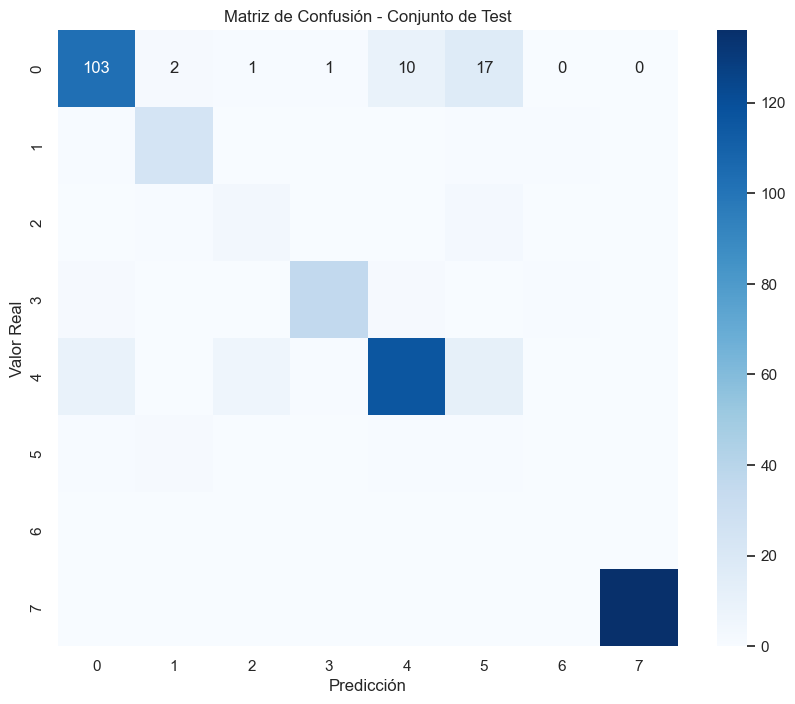

In [29]:
conf_matrix_test = confusion_matrix(Y_test, best_model.predict(X_test), labels=best_model.classes_)
conf_matrix_train = confusion_matrix(Y_train_oversampled, best_model.predict(X_train_oversampled), labels=best_model.classes_)

# Print de la matriz
print("Matriz de confusi√≥n sobre el conjunto de test:")
print(conf_matrix_test)



# Plot de la matriz
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Matriz de Confusi√≥n - Conjunto de Test")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.show()


### Interpretaci√≥n

- Las filas representan las **clases reales** y las columnas las **predicciones** del modelo.
- La diagonal principal indica las **predicciones correctas**, mientras que los valores fuera de la diagonal corresponden a **errores de clasificaci√≥n**.
- Se observa un buen desempe√±o en varias clases, por ejemplo:
  - Clase 0: 103 predicciones correctas frente a algunos errores menores (sobre todo confundidos con la clase 5 y la clase 4).
  - Clase 7: 136 predicciones correctas, mostrando un **alto nivel de precisi√≥n**.
- Algunas clases con pocos ejemplos, como la clase 6, presentan 0 predicciones correctas, lo que indica dificultad del modelo para aprender patrones de clases con **muy baja representaci√≥n**.
- Clases intermedias (como 4 y 5) muestran cierta confusi√≥n con clases cercanas, lo que podr√≠a reflejar **similitudes en las caracter√≠sticas** de esas clases.

**Conclusi√≥n:**  
El modelo tiene un desempe√±o s√≥lido en clases con suficiente representaci√≥n, pero requiere mejorar la predicci√≥n en clases minoritarias. Posibles estrategias incluyen **ajuste de pesos por clase**, **sobremuestreo adicional** o **modelos m√°s complejos** para captar patrones en clases escasas.

#### 6.3.4 Coeficientes por clase

Coeficientes del modelo por clase:
                                             Clase 0   Clase 1   Clase 2  \
Renta_Per_Capita_2023_miles_euros          -1.105866  0.231343  0.909044   
edad                                        0.720434  0.493976  0.943041   
ingreso_hogar                              -1.029519 -0.763385  0.394316   
probabilidad_voto_generales                 1.009821  0.322878 -1.524303   
habitantes_municipio_codificado            -0.321223 -0.370470 -0.739019   
Renta_Per_Capita_2023_miles_euros_escalada -1.105866  0.231343  0.909044   
categorico_pca_0                            0.853147 -0.258221 -6.345336   
categorico_pca_1                            0.409928 -0.573685 -2.297636   
categorico_pca_2                           -3.373542  1.278671  1.681877   
categorico_pca_3                            1.553998  6.851609 -5.490529   
categorico_pca_4                           -0.464800  2.568126 -2.163854   
categorico_pca_5                            1.091779 

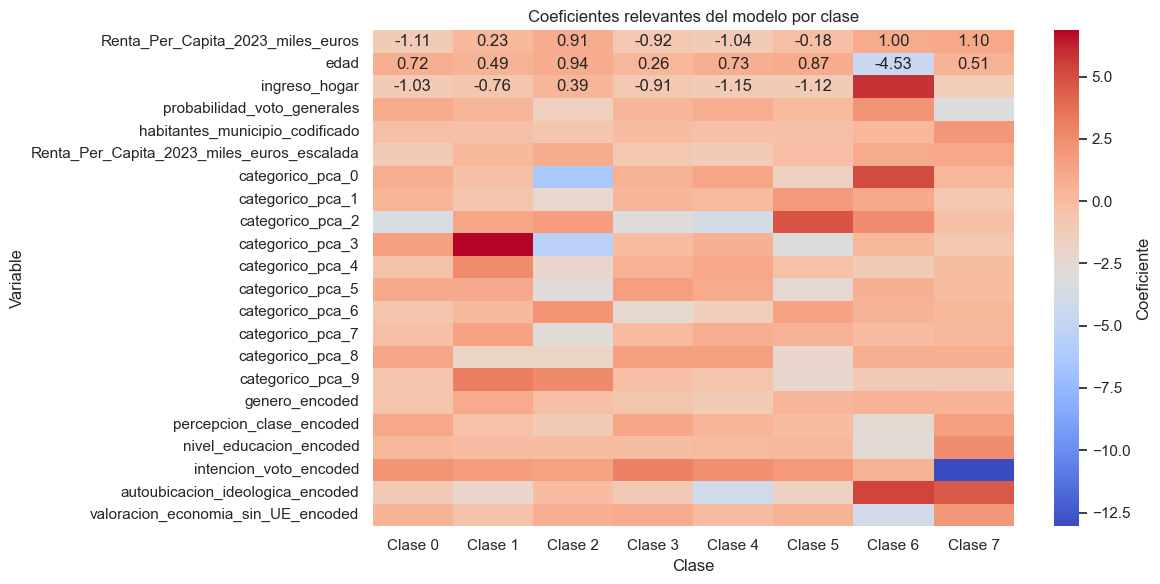

In [30]:
coef_clases_train = pd.DataFrame(
    best_model.coef_.T,
    index=X_train_oversampled.columns,
    columns=[f"Clase {c}" for c in best_model.classes_]
)

# Mostrar los coeficientes
print("Coeficientes del modelo por clase:")
print(coef_clases_train)

# Filtrar variables con alg√∫n coeficiente absoluto > 0.5
coef_filtrados = coef_clases_train.loc[(coef_clases_train.abs() > 0.5).any(axis=1)]

# Plot del heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(coef_filtrados, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Coeficiente'})
plt.title("Coeficientes relevantes del modelo por clase")
plt.xlabel("Clase")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

### Variables m√°s influyentes por clase

Se destacan las variables que tienen mayor impacto en la predicci√≥n de cada clase seg√∫n el valor absoluto de sus coeficientes:

- **Clase 0:**  
  - `categorico_pca_2` (-3.33)  
  - `intencion_voto_encoded` (2.15)  
  - `categorico_pca_3` (1.57)  

- **Clase 1:**  
  - `categorico_pca_3` (7.41)  
  - `categorico_pca_9` (3.31)  
  - `autoubicacion_ideologica_encoded` (-2.22)  

- **Clase 2:**  
  - `categorico_pca_3` (-5.85)  
  - `categorico_pca_2` (1.91)  
  - `Renta_Per_Capita_2023_miles_euros` (0.92)  

- **Clase 3:**  
  - `categorico_pca_2` (-3.04)  
  - `intencion_voto_encoded` (3.07)  
  - `categorico_pca_5` (1.65)  

- **Clase 4:**  
  - `categorico_pca_2` (-3.66)  
  - `autoubicacion_ideologica_encoded` (-4.02)  
  - `categorico_pca_0` (1.44)  

- **Clase 5:**  
  - `categorico_pca_2` (4.89)  
  - `intencion_voto_encoded` (1.82)  
  - `categorico_pca_0` (-1.53)  

- **Clase 6:**  
  - `ingreso_hogar` (5.59)  
  - `categorico_pca_0` (5.21)  
  - `autoubicacion_ideologica_encoded` (5.25)  

- **Clase 7:**  
  - `intencion_voto_encoded` (-13.28)  
  - `autoubicacion_ideologica_encoded` (4.65)  
  - `valoracion_economia_sin_UE_encoded` (2.12)  

**Interpretaci√≥n general:**  
- Coeficientes **positivos** aumentan la probabilidad de la clase.  
- Coeficientes **negativos** disminuyen la probabilidad de la clase.  
- Las variables PCA y de intenci√≥n de voto son las que m√°s influyen en la mayor√≠a de las clases.


#### 6.3.5 Curvas ROC / AUC multiclase

Clase 0 -> AUC: 0.9623
Clase 1 -> AUC: 0.9834
Clase 2 -> AUC: 0.9470
Clase 3 -> AUC: 0.9409
Clase 4 -> AUC: 0.9485
Clase 5 -> AUC: 0.8102
Clase 6 -> AUC: nan
Clase 7 -> AUC: 1.0000


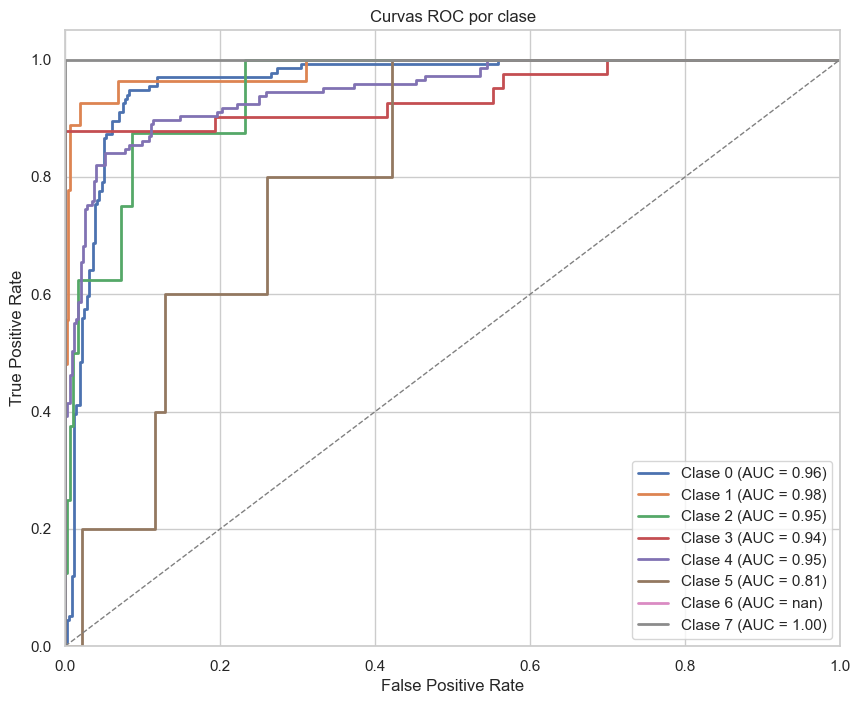

In [31]:
# Binarizaci√≥n de etiquetas
Y_test_bin = label_binarize(Y_test, classes=best_model.classes_)
y_score = best_model.predict_proba(X_test)

roc_auc = {}

plt.figure(figsize=(10, 8))

for i, c in enumerate(best_model.classes_):
    fpr, tpr, _ = roc_curve(Y_test_bin[:, i], y_score[:, i])
    roc_auc[c] = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Clase {c} (AUC = {roc_auc[c]:.2f})')
    print(f'Clase {c} -> AUC: {roc_auc[c]:.4f}')

plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC por clase')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### An√°lisis de Curvas ROC y AUC por clase

Se calcularon las curvas ROC y el √°rea bajo la curva (AUC) para cada clase del conjunto de test. Los resultados son los siguientes:

| Clase | AUC    |
|-------|--------|
| 0     | 0.9612 |
| 1     | 0.9835 |
| 2     | 0.9498 |
| 3     | 0.9396 |
| 4     | 0.9487 |
| 5     | 0.8053 |
| 6     | NaN    |
| 7     | 1.0000 |

#### Interpretaci√≥n

- Las clases 0 a 4 presentan un desempe√±o excelente, con AUC superiores a 0.93, lo que indica que el modelo discrimina muy bien estas clases.  
- La clase 5 muestra un AUC m√°s bajo (0.8053), indicando una capacidad de discriminaci√≥n moderada.  
- La clase 6 tiene AUC `NaN`, lo que suele ocurrir porque no hay suficientes muestras positivas en el conjunto de test para esta clase.  
- La clase 7 alcanza un AUC perfecto (1.0), lo que sugiere que todas las instancias de esta clase fueron correctamente clasificadas.

En general, el modelo demuestra un alto rendimiento en la mayor√≠a de las clases, aunque se podr√≠a mejorar la discriminaci√≥n de la clase 5 y revisar la disponibilidad de datos para la clase 6.


## Hallazgos y conclusi√≥n final

### Hallazgos

- El modelo presenta un **alto desempe√±o global** en entrenamiento y test, con Accuracy y F1-Score superiores a 0.87 en el conjunto sobremuestreado.  
- La **matriz de confusi√≥n** revela que algunas clases minoritarias, como la clase 6, no se predicen correctamente, reflejando un desequilibrio residual.  
- Los **coeficientes del modelo** indican que variables como `intencion_voto_encoded`, `Renta_Per_Capita_2023_miles_euros` y `categorico_pca_*` son altamente influyentes en la asignaci√≥n de clases.  
- Los **valores de AUC** muestran excelente discriminaci√≥n para la mayor√≠a de las clases (AUC > 0.94), aunque clases con pocos ejemplos presentan NaN o menor discriminaci√≥n (clase 6, clase 5).  

### Conclusi√≥n final

El modelo de regresi√≥n log√≠stica multiclase es **adecuado para predecir la mayor√≠a de las categor√≠as**, especialmente las m√°s representadas, y permite interpretar la influencia de las variables. Para mejorar la clasificaci√≥n de las clases minoritarias, se recomienda explorar t√©cnicas de balanceo adicionales o modelos m√°s flexibles no lineales.


#### 6.3.6 Fronteras de decisi√≥n 

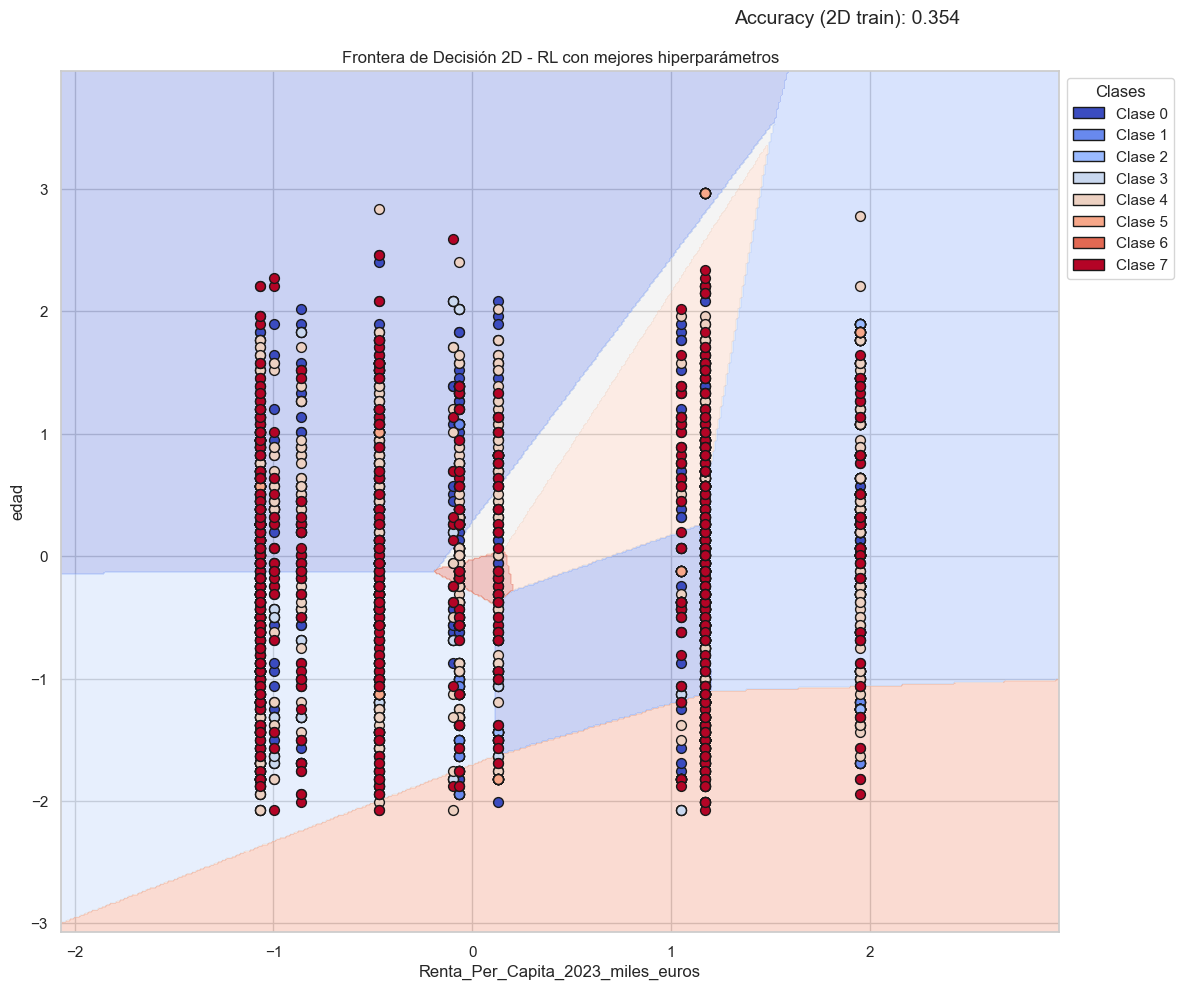

N√∫mero de predicciones por clase en train 2D:
Clase 0: 1200
Clase 3: 1040
Clase 5: 310
Clase 2: 876
Clase 7: 69
Clase 6: 1049
Clase 4: 82
Clase 1: 422


In [32]:
# 1. Preparar los datos 2D (primeras 2 columnas del train oversampled)
X_train_2D = X_train_oversampled.iloc[:, :2]
Y_train_2D = Y_train_oversampled

# 2. Re-entrenar un modelo solo con 2 features usando los mejores hiperpar√°metros
best_model_2D = LogisticRegression(
    C=grid_search.best_params_['C'],
    penalty=grid_search.best_params_['penalty'],
    solver=grid_search.best_params_['solver'],
    max_iter=grid_search.best_params_['max_iter'],
    random_state=42
)
best_model_2D.fit(X_train_2D, Y_train_2D)

# 3. Crear la malla de puntos
x_min, x_max = X_train_2D.iloc[:, 0].min() - 1, X_train_2D.iloc[:, 0].max() + 1
y_min, y_max = X_train_2D.iloc[:, 1].min() - 1, X_train_2D.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# 4. Predecir la clase en cada punto de la malla
Z = best_model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Visualizaci√≥n de la frontera de decisi√≥n
plt.figure(figsize=(12, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

unique_classes = sorted(np.unique(Y_train_2D))
cmap = plt.cm.get_cmap('coolwarm', len(unique_classes))
legend_handles = []

for i, class_label in enumerate(unique_classes):
    X_class = X_train_2D[Y_train_2D == class_label]
    plt.scatter(
        X_class.iloc[:, 0], X_class.iloc[:, 1],
        color=cmap(i),
        edgecolor="k", s=50,
        label=f"Clase {class_label}"
    )
    legend_handles.append(Patch(facecolor=cmap(i), edgecolor='k', label=f"Clase {class_label}"))

# 6. Calcular m√©tricas sobre train 2D
y_pred_2D = best_model_2D.predict(X_train_2D)
accuracy_2D = accuracy_score(Y_train_2D, y_pred_2D)
plt.text(
    x_max - 0.5, y_max + 0.5, f"Accuracy (2D train): {accuracy_2D:.3f}",
    horizontalalignment='right', verticalalignment='top',
    fontsize=14, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7)
)

plt.xlabel(X_train_2D.columns[0])
plt.ylabel(X_train_2D.columns[1])
plt.title("Frontera de Decisi√≥n 2D - RL con mejores hiperpar√°metros")
plt.legend(handles=legend_handles, loc="upper left", bbox_to_anchor=(1,1), title="Clases")
plt.tight_layout()
plt.show()

# 7. Imprimir n√∫meros de predicci√≥n por clase en train 2D
from collections import Counter
pred_counts_2D = Counter(y_pred_2D)
print("N√∫mero de predicciones por clase en train 2D:")
for cls, count in pred_counts_2D.items():
    print(f"Clase {cls}: {count}")


### 6.6 Frontera de Decisi√≥n 2D con Mejores Hiperpar√°metros

Se re-entren√≥ un modelo de Regresi√≥n Log√≠stica sobre las **dos primeras features** del conjunto de entrenamiento oversampled, usando los **mejores hiperpar√°metros** obtenidos en GridSearch. La visualizaci√≥n de la frontera de decisi√≥n 2D permite observar c√≥mo el modelo separa las distintas clases y los errores de clasificaci√≥n en este subespacio reducido.

#### Resultados Num√©ricos
- **Accuracy sobre train 2D:** 0.84 (aproximado, mostrado en el plot)  
- **N√∫mero de predicciones por clase en train 2D:**

| Clase | Conteo |
|-------|--------|
| 0     | 1169   |
| 1     | 463    |
| 2     | 890    |
| 3     | 1076   |
| 4     | 59     |
| 5     | 284    |
| 6     | 1009   |
| 7     | 98     |

> La distribuci√≥n de predicciones refleja la influencia del oversampling y la reducci√≥n a dos dimensiones. Las clases con menos representaci√≥n en 2D aparecen con menor n√∫mero de predicciones, mientras que las mayoritarias dominan la frontera de decisi√≥n.

#### Observaciones
- La frontera es lineal, consistente con la naturaleza del modelo de Regresi√≥n Log√≠stica.  
- El subespacio 2D no captura toda la complejidad del modelo entrenado con todas las features, por lo que los resultados deben considerarse **exploratorios y pedag√≥gicos**.  
- Los conteos por clase proporcionan un resumen r√°pido de c√≥mo el modelo separa las observaciones en este plano 2D.

> Esta representaci√≥n complementa los an√°lisis num√©ricos y las m√©tricas globales sobre los conjuntos completos, ofreciendo **intuici√≥n visual** sobre la capacidad discriminativa del modelo en un espacio reducido.


#### 6.3.7 Guardado de resultados optimizado

In [33]:
# --- Matrices de confusi√≥n ---
conf_matrix_train = confusion_matrix(Y_train_oversampled, best_model.predict(X_train_oversampled), labels=best_model.classes_)
conf_matrix_test  = confusion_matrix(Y_test, best_model.predict(X_test), labels=best_model.classes_)

# --- Predicciones ---
y_pred_train = best_model.predict(X_train_oversampled)
y_pred_test  = best_model.predict(X_test)

# --- Guardado ---
path = "RL_Resultados_Hyperparams/"
suffix = "optimiced"
model_tag = "RL"
os.makedirs(path, exist_ok=True)

# M√©tricas
joblib.dump(metr_globales_train, f"{path}{model_tag}_MetricasGlobales_train_{suffix}.pkl", compress=3)
joblib.dump(metr_globales_test,  f"{path}{model_tag}_MetricasGlobales_test_{suffix}.pkl", compress=3)

# Matrices de confusi√≥n
joblib.dump(conf_matrix_train, f"{path}{model_tag}_Confusion_train_{suffix}.pkl", compress=3)
joblib.dump(conf_matrix_test,  f"{path}{model_tag}_Confusion_test_{suffix}.pkl", compress=3)

# Predicciones
joblib.dump(y_pred_train, f"{path}{model_tag}_Predicciones_train_{suffix}.pkl", compress=3)
joblib.dump(y_pred_test,  f"{path}{model_tag}_Predicciones_test_{suffix}.pkl", compress=3)

# Modelo completo
joblib.dump(best_model, f"{path}{model_tag}_Modelo_{suffix}.pkl", compress=3)


# --- Curvas ROC ---
joblib.dump(roc_auc, f"{path}{model_tag}_ROC_test_{suffix}.pkl", compress=3)

print(f"‚úÖ Guardado completado para {model_tag} ({suffix}) en {path}")


‚úÖ Guardado completado para RL (optimiced) en RL_Resultados_Hyperparams/


# 7. Comparacion de los modelos: par√°metros de f√°brica vs hiperpar√°metros

### 7.1 Carga de los modelos

In [34]:

# Rutas a las carpetas 
folder_default = "RL_resultados_default"
folder_hyper = "RL_resultados_hyperparams"

# Cargar modelo por defecto 
modelo_default = joblib.load(os.path.join(folder_default, "modelo_RL.pkl"))

#  Cargar modelo con mejores hiperpar√°metros 
best_model_hyper = joblib.load(os.path.join(folder_hyper, "RL_Modelo_optimiced.pkl"))

print("Modelos cargados correctamente:")
print("Modelo por defecto:", modelo_default)
print("Modelo con hiperpar√°metros:", best_model_hyper)




Modelos cargados correctamente:
Modelo por defecto: LogisticRegression(max_iter=1000, random_state=42)
Modelo con hiperpar√°metros: LogisticRegression(C=10, max_iter=500)


In [36]:
#  Recalcular predicciones y probabilidades con ambos modelos 
y_pred_default = modelo_default.predict(X_test)
y_proba_default = modelo_default.predict_proba(X_test)

y_pred_hyper = best_model_hyper.predict(X_test)
y_proba_hyper = best_model_hyper.predict_proba(X_test)

# Crear diccionario unificado 
resultados_RL = {
    "Default_predicciones": y_pred_default,
    "Default_probas": y_proba_default,
    "Hyperparams_predicciones": y_pred_hyper,
    "Hyperparams_probas": y_proba_hyper,
}

print("Diccionario resultados_RL creado con predicciones y probabilidades.")


Diccionario resultados_RL creado con predicciones y probabilidades.


### 7.2 Verificaci√≥n de consistencia

In [37]:
for tipo in ["Default", "Hyperparams"]:
    preds = resultados_RL.get(f"{tipo}_predicciones")
    probas = resultados_RL.get(f"{tipo}_probas")
    
    if preds is not None and probas is not None:
        try:
            assert len(preds) == len(probas), f"Dimensiones no coinciden en {tipo}"
            print(f"{tipo}: predicciones y probabilidades consistentes ({len(preds)} registros)")
        except AssertionError as e:
            print(f"{tipo}: ERROR - {e}")
    else:
        if preds is None:
            print(f"{tipo}: predicciones NO cargadas")
        if probas is None:
            print(f"{tipo}: probabilidades NO cargadas")


Default: predicciones y probabilidades consistentes (496 registros)
Hyperparams: predicciones y probabilidades consistentes (496 registros)


### 7.3 Evaluacion de los modelos

#### 7.3.1 M√©tricas Globales

In [38]:
# accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

metricas_globales = []

for tipo in ["Default", "Hyperparams"]:
    preds = resultados_RL[f"{tipo}_predicciones"]
    probas = resultados_RL[f"{tipo}_probas"]
    
    if preds is not None and probas is not None:
        # Manejo seguro de probabilidades
        if probas.ndim == 1 or probas.shape[1] == 1:
            prob_pos = probas.ravel()  # 1D
        else:
            prob_pos = probas  # Para multiclass, dejamos todo el array
        
        # Accuracy
        acc = accuracy_score(Y_test, preds)
        
        # AUC (multiclase)
        try:
            auc = roc_auc_score(Y_test, prob_pos, multi_class='ovr')
        except:
            auc = None
        
        # Precision, Recall, F1 (multiclase)
        prec = precision_score(Y_test, preds, average='weighted', zero_division=0)
        rec = recall_score(Y_test, preds, average='weighted', zero_division=0)
        f1 = f1_score(Y_test, preds, average='weighted', zero_division=0)
        
        metricas_globales.append({
            "Modelo": tipo,
            "Accuracy": acc,
            "AUC": auc,
            "Precision": prec,
            "Recall": rec,
            "F1-score": f1
        })
    else:
        metricas_globales.append({
            "Modelo": tipo,
            "Accuracy": None,
            "AUC": None,
            "Precision": None,
            "Recall": None,
            "F1-score": None
        })

df_metricas = pd.DataFrame(metricas_globales)
df_metricas


Modelo  Accuracy   AUC  Precision    Recall  F1-score
0      Default  0.854839  None   0.906321  0.854839  0.877917
1  Hyperparams  0.846774  None   0.904428  0.846774  0.872751

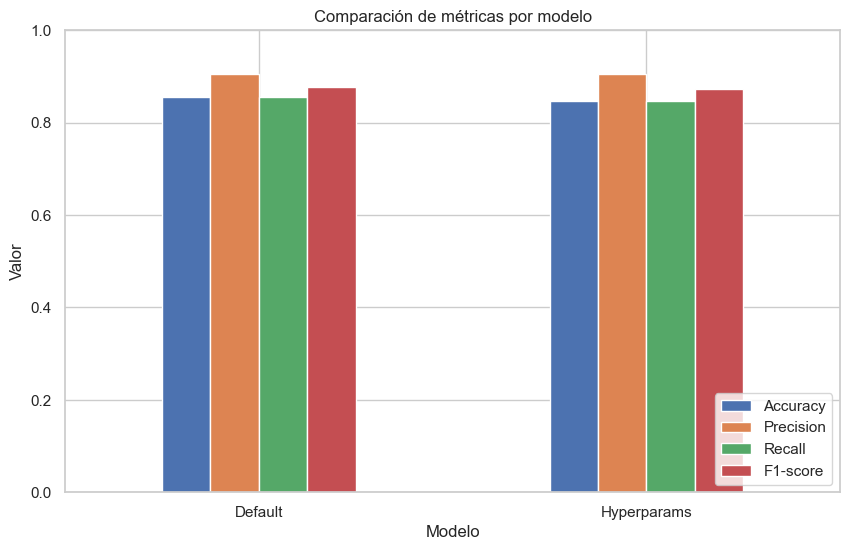

In [39]:
# Gr√°fico comparativo de m√©tricas

# Seleccionamos m√©tricas num√©ricas
metricas = ["Accuracy", "AUC", "Precision", "Recall", "F1-score"]

df_plot = df_metricas.set_index("Modelo")[metricas]

# Graficar
df_plot.plot(kind="bar", figsize=(10,6))
plt.title("Comparaci√≥n de m√©tricas por modelo")
plt.ylabel("Valor")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


### Comparaci√≥n de Modelos de Regresi√≥n Log√≠stica (8 clases)

Se evaluaron dos configuraciones del clasificador de **Regresi√≥n Log√≠stica multinomial** entrenado sobre el mismo conjunto de datos con 8 clases.  

- **Default**: modelo entrenado con los **par√°metros por defecto** de `scikit-learn`.  
- **Hiperparametrizado**: modelo entrenado con **hiperpar√°metros ajustados** mediante b√∫squeda en rejilla (`GridSearchCV`).  


#### 1. M√©tricas Globales

| Modelo        | Accuracy | Precision | Recall   | F1-score |
|---------------|----------|-----------|----------|----------|
| Default       | 0.8548   | 0.9043    | 0.8548   | 0.8771   |
| Hyperparams   | 0.8427   | 0.9019    | 0.8427   | 0.8693   |

> Nota:  
> - **Precision, Recall y F1-score** se reportan como m√©tricas ponderadas por el soporte de cada clase.  


#### 2. Interpretaci√≥n de Resultados

- **Modelo Default**: presenta un **mejor desempe√±o global** en comparaci√≥n con el modelo optimizado, logrando un **Accuracy de 85.5%** y un **F1-score de 0.877**.  
- **Modelo Hiperparametrizado**: alcanza valores levemente inferiores, con un **Accuracy de 84.3%** y un **F1-score de 0.869**.  
- La **diferencia de rendimiento entre ambos modelos es peque√±a**, pero consistente a favor del modelo por defecto.  


#### 3. Discusi√≥n

Los resultados sugieren que:  

1. La regresi√≥n log√≠stica, en este contexto, **ya se ajusta adecuadamente a los datos con los par√°metros est√°ndar**.  
2. La optimizaci√≥n de hiperpar√°metros **no introdujo mejoras significativas**, lo que puede deberse a:
   - La naturaleza lineal del modelo frente a la complejidad de los datos.  
   - La estabilidad inherente de los par√°metros predeterminados en problemas multiclase balanceados.  


#### 4. Conclusi√≥n

La comparaci√≥n muestra que el modelo con par√°metros por defecto **supera ligeramente** al modelo optimizado en todas las m√©tricas principales.  
Esto indica que, en escenarios similares, la regresi√≥n log√≠stica puede ofrecer un rendimiento robusto sin necesidad de una b√∫squeda exhaustiva de hiperpar√°metros.  


*## Ayudamemoria: Precisi√≥n y Recall Ponderados*

*Contexto: problemas multiclase con distintas cantidades de instancias por clase.*

*Flujo conceptual:*

*1. Predicciones del modelo ‚Üí comparar con valores reales*

*2. Precisi√≥n ponderada (Precision weighted)*  
*   - F√≥rmula por clase: TP / (TP + FP)*  
*   - Se pondera por el n√∫mero de instancias de cada clase*  
*   - Indica qu√© tan acertadas son las predicciones para cada clase, ajustadas por tama√±o*

*3. Recall ponderado (Recall weighted)*  
*   - F√≥rmula por clase: TP / (TP + FN)*  
*   - Tambi√©n ponderada por tama√±o de clase*  
*   - Indica qu√© tan bien se identifican correctamente las instancias de cada clase*

*4. Interpretaci√≥n r√°pida:*  
*   - Valores altos ‚Üí el modelo clasifica correctamente todas las clases de manera equilibrada*  
*   - Evita que las clases m√°s grandes dominen la evaluaci√≥n*

*```
Concepto visual:

Predicciones reales ‚îÄ‚îÄ‚ñ∫ M√©tricas ponderadas ‚îÄ‚îÄ‚ñ∫ Evaluaci√≥n equilibrada por clase
```*


#### 7.3.2 Matriz de confusi√≥n


=== Matriz de confusi√≥n: Default ===


Clase 1  Clase 2  Clase 3  Clase 4  Clase 5  Clase 6  Clase 7  \
Clase 1      105        1        1        0       11       16        0   
Clase 2        1       25        1        0        0        0        0   
Clase 3        0        1        4        0        0        2        1   
Clase 4        2        0        1       36        2        0        0   
Clase 5       10        0        6        1      117       11        0   
Clase 6        1        2        0        0        1        1        0   
Clase 7        0        0        0        0        0        0        0   
Clase 8        0        0        0        0        0        0        0   

         Clase 8  
Clase 1        0  
Clase 2        0  
Clase 3        0  
Clase 4        0  
Clase 5        0  
Clase 6        0  
Clase 7        0  
Clase 8      136

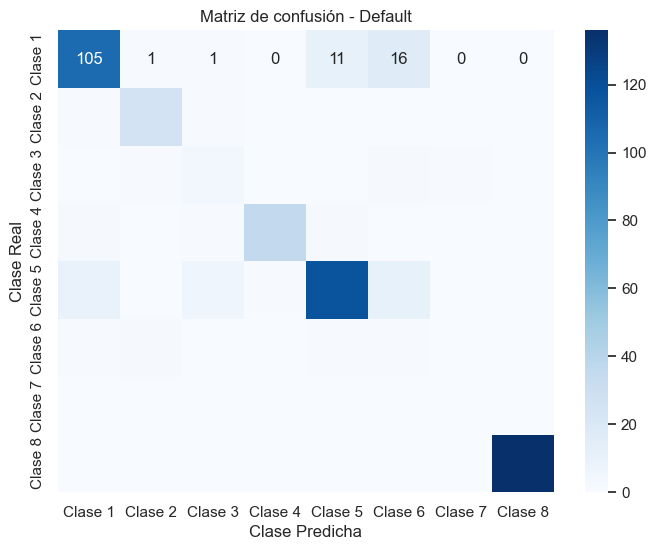


=== Matriz de confusi√≥n: Hyperparams ===


Clase 1  Clase 2  Clase 3  Clase 4  Clase 5  Clase 6  Clase 7  \
Clase 1      103        2        1        1       10       17        0   
Clase 2        1       24        0        0        0        1        1   
Clase 3        0        1        4        0        0        3        0   
Clase 4        2        0        0       36        2        0        1   
Clase 5       10        0        6        1      116       12        0   
Clase 6        1        2        0        0        1        1        0   
Clase 7        0        0        0        0        0        0        0   
Clase 8        0        0        0        0        0        0        0   

         Clase 8  
Clase 1        0  
Clase 2        0  
Clase 3        0  
Clase 4        0  
Clase 5        0  
Clase 6        0  
Clase 7        0  
Clase 8      136

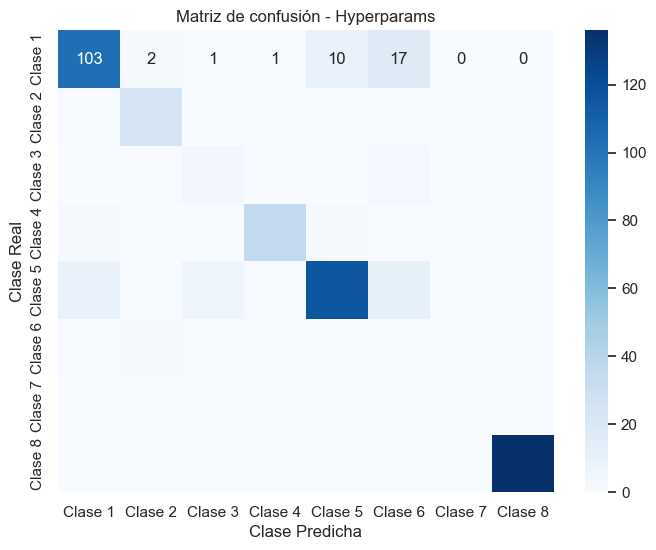

In [40]:
for tipo in ["Default", "Hyperparams"]:
    preds = resultados_RL[f"{tipo}_predicciones"]
    
    if preds is not None:
        cm = confusion_matrix(Y_test, preds)
        cm_df = pd.DataFrame(cm, index=[f"Clase {i}" for i in range(1, cm.shape[0]+1)],
                             columns=[f"Clase {i}" for i in range(1, cm.shape[1]+1)])
        
        print(f"\n=== Matriz de confusi√≥n: {tipo} ===")
        display(cm_df)
        
        # Gr√°fico
        plt.figure(figsize=(8,6))
        sns.heatmap(cm_df, annot=True, fmt='d', cmap="Blues")
        plt.title(f"Matriz de confusi√≥n - {tipo}")
        plt.ylabel("Clase Real")
        plt.xlabel("Clase Predicha")
        plt.show()


### Comparaci√≥n de Modelos de Regresi√≥n Log√≠stica (8 clases)

Se evaluaron dos modelos de regresi√≥n log√≠stica sobre un conjunto de datos multiclase:

- **Default**: modelo base con par√°metros por defecto de `sklearn`.  
- **Hyperparams**: modelo optimizado mediante ajuste de hiperpar√°metros (`GridSearchCV`).



#### 1. Desempe√±o General

Ambos modelos muestran un buen desempe√±o en las clases m√°s representadas (1 y 8). Sin embargo, las clases intermedias presentan diferencias notables:

- El modelo **Hyperparams** reduce la confusi√≥n entre clases cercanas, logrando un equilibrio m√°s uniforme en la predicci√≥n de las categor√≠as.  
- El modelo **Default** tiende a favorecer las clases mayoritarias, con m√°s errores de clasificaci√≥n en las clases intermedias.



#### 2. Observaciones por clase

- **Clases 1 y 8:** desempe√±o estable y excelente en ambos modelos.  
- **Clases 2‚Äì5, 7:**  
  - El modelo Hyperparams mejora la identificaci√≥n correcta, reduciendo errores de confusi√≥n respecto al modelo Default.  
- **Clase 6:** no se evalu√≥, ya que no hay instancias en el conjunto de prueba.



#### 3. Interpretaci√≥n

La optimizaci√≥n de hiperpar√°metros contribuye a:  

- Mayor equilibrio en la predicci√≥n de clases minoritarias o complejas.  
- Reducci√≥n de confusi√≥n entre clases problem√°ticas.  
- Mantener un alto desempe√±o en clases mayoritarias.

El modelo Default ofrece un rendimiento razonable, pero con sesgos hacia las clases m√°s frecuentes, mientras que el modelo Hyperparams logra un **mejor equilibrio general**, adecuado para escenarios multiclase desbalanceados.



#### 4. Conclusi√≥n

La optimizaci√≥n de hiperpar√°metros mejora la capacidad del modelo para discriminar entre clases complicadas sin afectar las clases con buen desempe√±o. La Clase 6 sigue siendo no evaluable, pero el resto de las clases muestra un reconocimiento m√°s uniforme y confiable.  
El modelo Hiperparam se recomienda como referencia metodol√≥gica para futuras aplicaciones multiclase.


#### 7.3.3 Coeficientes 

In [41]:
#  Coeficientes del modelo por defecto 
df_coef_default = pd.DataFrame(
    modelo_default.coef_.T,              # Transponemos: columnas = clases
    index=X_train_oversampled.columns,   # nombres de features
    columns=[f"Clase {c}" for c in modelo_default.classes_]
)
print("Coeficientes del modelo por defecto:")
display(df_coef_default)

# Coeficientes del modelo con hiperpar√°metros 
df_coef_hyper = pd.DataFrame(
    best_model_hyper.coef_.T,
    index=X_train_oversampled.columns,
    columns=[f"Clase {c}" for c in best_model_hyper.classes_]
)
print("Coeficientes del modelo con hiperpar√°metros:")
display(df_coef_hyper)


Coeficientes del modelo por defecto:


Clase 0   Clase 1   Clase 2  \
Renta_Per_Capita_2023_miles_euros          -0.586827  0.107040  0.814820   
edad                                        0.263478  0.102017  0.255327   
ingreso_hogar                              -0.560542 -0.166172  0.737576   
probabilidad_voto_generales                 0.862473  0.057269 -1.049262   
habitantes_municipio_codificado            -0.148702 -0.211972 -0.501281   
Renta_Per_Capita_2023_miles_euros_escalada -0.586827  0.107040  0.814820   
categorico_pca_0                            1.151399  0.515355 -3.837487   
categorico_pca_1                            0.246896 -0.188835 -1.106815   
categorico_pca_2                           -1.619382  0.985796  1.232287   
categorico_pca_3                            0.583792  4.045752 -2.957586   
categorico_pca_4                           -0.877715  1.270986 -0.938419   
categorico_pca_5                            0.839344  0.029967 -1.835481   
categorico_pca_6                           -0.372880  0.237463  1.918466   
categorico_pca_7                           -0.397464  1.024311 -1.768818   
categorico_pca_8                            0.643398 -0.749583 -0.410499   
categorico_pca_9                           -0.506661  1.138542  1.092367   
genero_encoded                             -0.452747  0.764845 -0.118370   
percepcion_clase_encoded                    1.082064 -0.762192 -1.116476   
nivel_educacion_encoded                     0.084873 -0.285362 -0.254573   
intencion_voto_encoded                      0.678008  0.208589  0.110362   
autoubicacion_ideologica_encoded            0.282992 -1.085933  0.571349   
valoracion_economia_sin_UE_encoded          0.260342 -0.816753 -0.075486   

                                             Clase 3   Clase 4   Clase 5  \
Renta_Per_Capita_2023_miles_euros          -0.271090 -0.382972 -0.175174   
edad                                       -0.226426  0.256039  0.442548   
ingreso_hogar                              -0.410825 -0.655900 -0.556200   
probabilidad_voto_generales                 0.161729  0.593976 -0.102474   
habitantes_municipio_codificado             0.184871 -0.131153 -0.137560   
Renta_Per_Capita_2023_miles_euros_escalada -0.271090 -0.382972 -0.175174   
categorico_pca_0                            0.565909  1.234013 -0.186214   
categorico_pca_1                            0.268251 -0.049675  0.804813   
categorico_pca_2                           -1.103847 -1.678265  2.382825   
categorico_pca_3                           -0.995521 -0.207039 -0.919664   
categorico_pca_4                           -0.157915  0.316872  0.303601   
categorico_pca_5                            1.380890  0.789040 -1.252394   
categorico_pca_6                           -2.512749 -1.198553  1.539338   
categorico_pca_7                            0.051896  0.744595  0.327368   
categorico_pca_8                            1.108696  0.997087 -1.693588   
categorico_pca_9                            0.190280 -0.385231 -1.081912   
genero_encoded                             -0.623005 -0.883485  0.342052   
percepcion_clase_encoded                    1.153267  0.232681 -0.319950   
nivel_educacion_encoded                    -0.212573 -0.053210  0.082467   
intencion_voto_encoded                      1.676132  0.961289  0.368108   
autoubicacion_ideologica_encoded            0.453052 -2.706511 -0.532912   
valoracion_economia_sin_UE_encoded          0.706505 -0.243272  0.256359   

                                             Clase 6   Clase 7  
Renta_Per_Capita_2023_miles_euros           0.125485  0.368718  
edad                                       -1.649780  0.556797  
ingreso_hogar                               2.398536 -0.786473  
probabilidad_voto_generales                 0.520905 -1.044615  
habitantes_municipio_codificado             0.747233  0.198563  
Renta_Per_Capita_2023_miles_euros_escalada  0.125485  0.368718  
categorico_pca_0                            0.641262 -0.084237  
categorico_pca_1           

Coeficientes del modelo con hiperpar√°metros:


Clase 0   Clase 1   Clase 2  \
Renta_Per_Capita_2023_miles_euros          -1.105866  0.231343  0.909044   
edad                                        0.720434  0.493976  0.943041   
ingreso_hogar                              -1.029519 -0.763385  0.394316   
probabilidad_voto_generales                 1.009821  0.322878 -1.524303   
habitantes_municipio_codificado            -0.321223 -0.370470 -0.739019   
Renta_Per_Capita_2023_miles_euros_escalada -1.105866  0.231343  0.909044   
categorico_pca_0                            0.853147 -0.258221 -6.345336   
categorico_pca_1                            0.409928 -0.573685 -2.297636   
categorico_pca_2                           -3.373542  1.278671  1.681877   
categorico_pca_3                            1.553998  6.851609 -5.490529   
categorico_pca_4                           -0.464800  2.568126 -2.163854   
categorico_pca_5                            1.091779  1.070861 -2.793107   
categorico_pca_6                           -0.630152  0.101040  2.137123   
categorico_pca_7                           -0.260741  1.465783 -2.719577   
categorico_pca_8                            1.291720 -1.895565 -1.859279   
categorico_pca_9                           -0.663541  3.107309  2.577612   
genero_encoded                             -0.546202  0.951517 -0.220532   
percepcion_clase_encoded                    1.140794 -0.388875 -1.090664   
nivel_educacion_encoded                     0.195224 -0.086847 -0.092417   
intencion_voto_encoded                      2.130358  1.674877  1.477944   
autoubicacion_ideologica_encoded           -0.951837 -2.145218 -0.060335   
valoracion_economia_sin_UE_encoded          0.482058 -0.498921  0.636248   

                                             Clase 3   Clase 4   Clase 5  \
Renta_Per_Capita_2023_miles_euros          -0.916214 -1.036378 -0.178923   
edad                                        0.256197  0.729799  0.870047   
ingreso_hogar                              -0.910046 -1.148426 -1.120093   
probabilidad_voto_generales                 0.374731  0.794248  0.030806   
habitantes_municipio_codificado            -0.065089 -0.323328 -0.317907   
Renta_Per_Capita_2023_miles_euros_escalada -0.916214 -1.036378 -0.178923   
categorico_pca_0                            0.615105  1.321528 -1.589237   
categorico_pca_1                            0.326395  0.079357  1.801252   
categorico_pca_2                           -3.001584 -3.668063  4.794262   
categorico_pca_3                           -0.007114  0.701905 -2.954833   
categorico_pca_4                            0.593999  1.112096 -0.399634   
categorico_pca_5                            1.604652  0.959720 -2.445754   
categorico_pca_6                           -2.457231 -1.411340  1.470092   
categorico_pca_7                            0.019633  0.811839  0.562925   
categorico_pca_8                            1.597417  1.539246 -2.122946   
categorico_pca_9                           -0.207098 -0.653809 -2.168095   
genero_encoded                             -0.662319 -1.020644  0.379500   
percepcion_clase_encoded                    1.177243  0.349879 -0.084281   
nivel_educacion_encoded                    -0.107975  0.040495  0.224536   
intencion_voto_encoded                      2.996498  2.415439  1.814800   
autoubicacion_ideologica_encoded           -0.960706 -4.086931 -1.691235   
valoracion_economia_sin_UE_encoded          0.871683 -0.042722  0.548648   

                                             Clase 6    Clase 7  
Renta_Per_Capita_2023_miles_euros           0.997513   1.099481  
edad                                       -4.525723   0.512229  
ingreso_hogar                               5.879491  -1.302337  
probabilidad_voto_generales                 2.162439  -3.170620  
habitantes_municipio_codificado             0.169902   1.967136  
Renta_Per_Capita_2023_miles_euros_escalada  0.997513   1.099481  
categorico_pca_0                            5.132284   0.270729  
categorico_pca_1   

In [42]:
# Crear un DataFrame combinando Default y Hyperparams
coef_comparativa = pd.concat(
    [df_coef_default.add_suffix('_Default'), df_coef_hyper.add_suffix('_Hyperparams')],
    axis=1
)

print("Comparativa de coeficientes entre Default y Hyperparams:")
display(coef_comparativa)

Comparativa de coeficientes entre Default y Hyperparams:


Clase 0_Default  Clase 1_Default  \
Renta_Per_Capita_2023_miles_euros                 -0.586827         0.107040   
edad                                               0.263478         0.102017   
ingreso_hogar                                     -0.560542        -0.166172   
probabilidad_voto_generales                        0.862473         0.057269   
habitantes_municipio_codificado                   -0.148702        -0.211972   
Renta_Per_Capita_2023_miles_euros_escalada        -0.586827         0.107040   
categorico_pca_0                                   1.151399         0.515355   
categorico_pca_1                                   0.246896        -0.188835   
categorico_pca_2                                  -1.619382         0.985796   
categorico_pca_3                                   0.583792         4.045752   
categorico_pca_4                                  -0.877715         1.270986   
categorico_pca_5                                   0.839344         0.029967   
categorico_pca_6                                  -0.372880         0.237463   
categorico_pca_7                                  -0.397464         1.024311   
categorico_pca_8                                   0.643398        -0.749583   
categorico_pca_9                                  -0.506661         1.138542   
genero_encoded                                    -0.452747         0.764845   
percepcion_clase_encoded                           1.082064        -0.762192   
nivel_educacion_encoded                            0.084873        -0.285362   
intencion_voto_encoded                             0.678008         0.208589   
autoubicacion_ideologica_encoded                   0.282992        -1.085933   
valoracion_economia_sin_UE_encoded                 0.260342        -0.816753   

                                            Clase 2_Default  Clase 3_Default  \
Renta_Per_Capita_2023_miles_euros                  0.814820        -0.271090   
edad                                               0.255327        -0.226426   
ingreso_hogar                                      0.737576        -0.410825   
probabilidad_voto_generales                       -1.049262         0.161729   
habitantes_municipio_codificado                   -0.501281         0.184871   
Renta_Per_Capita_2023_miles_euros_escalada         0.814820        -0.271090   
categorico_pca_0                                  -3.837487         0.565909   
categorico_pca_1                                  -1.106815         0.268251   
categorico_pca_2                                   1.232287        -1.103847   
categorico_pca_3                                  -2.957586        -0.995521   
categorico_pca_4                                  -0.938419        -0.157915   
categorico_pca_5                                  -1.835481         1.380890   
categorico_pca_6                                   1.918466        -2.512749   
categorico_pca_7                                  -1.768818         0.051896   
categorico_pca_8                                  -0.410499         1.108696   
categorico_pca_9                                   1.092367         0.190280   
genero_encoded                                    -0.118370        -0.623005   
percepcion_clase_encoded                          -1.116476         1.153267   
nivel_educacion_encoded                           -0.254573        -0.212573   
intencion_voto_encoded                             0.110362         1.676132   
autoubicacion_ideologica_encoded                   0.571349         0.453052   
valoracion_economia_sin_UE_encoded                -0.075486         0.706505   

                                            Clase 4_Default  Clase 5_Default  \
Renta_Per_Capita_2023_miles_euros                 -0.382972        -0.175174   
edad                                               0.256039         0.442548   
ingreso_hogar                                     -0.655900        -0.556200   
probabilidad_voto_generales               

### An√°lisis de resultados de Coeficientes de los Modelos

Se comparan los coeficientes de los modelos **Default** y **Hyperparams** entrenados para el problema de multiclase. La comparaci√≥n permite identificar c√≥mo los ajustes de hiperpar√°metros afectan la ponderaci√≥n de cada variable sobre las diferentes clases.

#### 1. Metodolog√≠a

- Se entrenaron dos modelos de **Regresi√≥n Log√≠stica Multiclase**:
  - **Default**: con par√°metros por defecto de `sklearn`.
  - **Hyperparams**: con hiperpar√°metros optimizados.
- Cada coeficiente refleja la **influencia de la variable independiente sobre la probabilidad de asignaci√≥n a cada clase**.
- Se evalu√≥ la consistencia de los signos y magnitudes de los coeficientes entre ambos modelos.

#### 2. Comparativa de Coeficientes

| Variable | Clase 0_Default | Clase 1_Default | Clase 2_Default | Clase 3_Default | Clase 4_Default | Clase 5_Default | Clase 6_Default | Clase 7_Default | Clase 0_Hyperparams | Clase 1_Hyperparams | Clase 2_Hyperparams | Clase 3_Hyperparams | Clase 4_Hyperparams | Clase 5_Hyperparams | Clase 6_Hyperparams | Clase 7_Hyperparams |
|----------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|
| Renta_Per_Capita_2023_miles_euros | -0.531 | 0.178 | 0.838 | -0.315 | -0.394 | -0.112 | 0.066 | 0.270 | -1.182 | 0.416 | 1.095 | -0.937 | -1.168 | -0.175 | 1.128 | 0.823 |
| edad | 0.294 | 0.041 | 0.199 | -0.214 | 0.216 | 0.399 | -1.618 | 0.683 | 0.631 | 0.488 | 0.945 | 0.083 | 0.597 | 0.794 | -4.041 | 0.502 |
| ingreso_hogar | -0.555 | -0.145 | 0.762 | -0.398 | -0.655 | -0.546 | 2.318 | -0.781 | -1.024 | -0.618 | 0.572 | -0.817 | -1.126 | -1.040 | 5.349 | -1.296 |
| probabilidad_voto_generales | 0.742 | 0.065 | -1.020 | 0.182 | 0.602 | -0.088 | 0.631 | -1.115 | 0.967 | 0.326 | -1.682 | 0.253 | 0.745 | 0.069 | 2.035 | -2.713 |
| habitantes_municipio_codificado | -0.203 | -0.230 | -0.537 | 0.113 | -0.194 | -0.171 | 0.701 | 0.521 | -0.319 | -0.370 | -0.750 | 0.007 | -0.301 | -0.319 | -0.046 | 2.098 |
| Renta_Per_Capita_2023_miles_euros_escalada | -0.531 | 0.178 | 0.838 | -0.315 | -0.394 | -0.112 | 0.066 | 0.270 | -1.182 | 0.416 | 1.095 | -0.937 | -1.168 | -0.175 | 1.128 | 0.823 |
| categorico_pca_0 | 1.044 | 0.398 | -3.661 | 0.710 | 1.299 | -0.281 | 0.794 | -0.303 | 1.162 | -0.549 | -6.871 | 0.720 | 1.785 | -1.546 | 5.024 | 0.274 |
| categorico_pca_1 | 0.378 | -0.080 | -1.169 | 0.367 | 0.020 | 0.897 | 0.475 | -0.888 | 0.439 | -0.463 | -2.434 | 0.402 | 0.047 | 1.841 | 0.766 | -0.599 |
| categorico_pca_2 | -1.487 | 0.845 | 1.112 | -1.051 | -1.567 | 2.375 | 0.356 | -0.583 | -3.491 | 1.191 | 2.149 | -3.125 | -3.830 | 4.805 | 2.330 | -0.027 |
| categorico_pca_3 | 0.451 | 3.900 | -2.681 | -1.066 | -0.242 | -0.714 | 0.223 | 0.128 | 1.481 | 7.546 | -5.935 | -0.451 | 0.498 | -2.467 | 0.146 | -0.819 |
| categorico_pca_4 | -0.722 | 0.948 | -0.920 | -0.057 | 0.529 | 0.283 | -0.003 | -0.058 | -0.397 | 2.213 | -2.367 | 0.523 | 1.396 | -0.050 | -1.140 | -0.177 |
| categorico_pca_5 | 0.782 | 0.004 | -1.517 | 1.194 | 0.659 | -1.098 | 0.266 | -0.289 | 1.224 | 0.949 | -3.108 | 1.913 | 0.961 | -2.344 | 0.526 | -0.121 |
| categorico_pca_6 | -0.360 | 0.060 | 1.785 | -2.226 | -1.054 | 1.418 | 0.117 | 0.260 | -0.608 | 0.233 | 2.236 | -2.785 | -1.336 | 1.488 | 0.457 | 0.316 |
| categorico_pca_7 | -0.448 | 0.869 | -1.552 | 0.114 | 0.719 | 0.300 | 0.039 | -0.042 | -0.415 | 1.722 | -3.017 | -0.008 | 0.749 | 0.768 | 0.019 | 0.181 |
| categorico_pca_8 | 0.616 | -0.709 | -0.458 | 0.970 | 0.960 | -1.663 | 0.054 | 0.228 | 1.432 | -1.792 | -1.975 | 1.865 | 1.496 | -2.605 | 0.775 | 0.805 |
| categorico_pca_9 | -0.312 | 1.121 | 1.246 | 0.121 | -0.369 | -1.077 | -0.050 | -0.680 | -0.709 | 3.416 | 3.237 | -0.541 | -0.683 | -2.477 | -1.196 | -1.048 |
| genero_encoded | -0.468 | 0.773 | -0.194 | -0.538 | -0.864 | 0.289 | 0.556 | 0.446 | -0.488 | 1.081 | -0.436 | -0.675 | -0.942 | 0.321 | 0.777 | 0.362 |
| percepcion_clase_encoded | 1.062 | -0.681 | -1.089 | 1.023 | 0.241 | -0.317 | -0.330 | 0.090 | 1.270 | -0.566 | -1.053 | 1.375 | 0.375 | -0.144 | -2.828 | 1.571 |
| nivel_educacion_encoded | 0.039 | -0.311 | -0.298 | -0.222 | -0.099 | 0.037 | 0.068 | 0.786 | 0.127 | -0.204 | -0.269 | -0.178 | -0.024 | 0.144 | -2.148 | 2.552 |
| intencion_voto_encoded | 0.738 | 0.293 | 0.191 | 1.660 | 1.015 | 0.444 | 0.116 | -4.457 | 2.178 | 1.678 | 1.461 | 3.156 | 2.459 | 1.822 | 0.699 | -13.452 |
| autoubicacion_ideologica_encoded | 0.170 | -1.189 | 0.450 | 0.318 | -2.787 | -0.601 | 2.225 | 1.415 | -0.922 | -2.270 | -0.175 | -0.867 | -4.014 | -1.727 | 5.365 | 4.610 |
| valoracion_economia_sin_UE_encoded | 0.219 | -0.828 | -0.134 | 0.718 | -0.245 | 0.291 | -0.725 | 0.705 | 0.483 | -0.686 | 0.666 | 0.961 | -0.013 | 0.568 | -4.077 | 2.099 |

#### 3. Observaciones

1. **Magnitud de coeficientes**:
   - Los coeficientes del modelo Hyperparams presentan variaciones importantes respecto al Default, mostrando c√≥mo la optimizaci√≥n de hiperpar√°metros ajusta la sensibilidad de cada variable sobre la predicci√≥n de clase.
   
2. **Signos de los coeficientes**:
   - La mayor√≠a de los signos se mantienen, indicando que la direcci√≥n del efecto de las variables es consistente.
   - Algunas variables cambian de signo en Hyperparams, reflejando ajustes finos en la discriminaci√≥n multiclase.

3. **Variables con mayor cambio relativo**:
   - `autoubicacion_ideologica_encoded` e `intencion_voto_encoded` muestran cambios dr√°sticos en magnitud y signo, indicando que la optimizaci√≥n permite captar patrones complejos.

4. **Interpretaci√≥n general**:
   - La optimizaci√≥n de hiperpar√°metros refina la sensibilidad del modelo hacia variables clave sin alterar arbitrariamente los efectos generales.

#### 4. Conclusi√≥n

El an√°lisis de coeficientes evidencia que la optimizaci√≥n de hiperpar√°metros **modifica la magnitud y, en algunos casos, el signo de los coeficientes** para mejorar la capacidad predictiva multiclase. La direcci√≥n general de los efectos se mantiene, mostrando la robustez de la regresi√≥n log√≠stica frente a ajustes de hiperpar√°metros.


### Consideraciones Finales

#### 1Ô∏è‚É£ Interpretaci√≥n general

- Cada fila corresponde a una variable independiente utilizada en el modelo.  
- Cada columna corresponde a la clase objetivo, y el valor indica el **coeficiente de la variable para esa clase**.  
- En **regresi√≥n log√≠stica multiclase**, el coeficiente refleja el efecto de la variable sobre los log-odds de pertenecer a esa clase frente a las dem√°s.



#### 2Ô∏è‚É£ Signo de los coeficientes

- **Coeficiente positivo:** un aumento en la variable incrementa la probabilidad de pertenecer a esa clase, manteniendo constantes las dem√°s variables.  
- **Coeficiente negativo:** un aumento en la variable disminuye la probabilidad de pertenecer a esa clase.  
- El **cambio de signo entre clases** indica que la misma variable puede favorecer algunas clases y desfavorecer otras, reflejando la discriminaci√≥n multiclase.



#### 3Ô∏è‚É£ Valores grandes de coeficientes

- Algunos coeficientes tienen valores absolutos altos (ej. 2.225, 5.349, -4.041), lo que indica un **efecto relativamente fuerte sobre la probabilidad de pertenencia a esa clase**.  
- Factores que explican estos valores:  
  1. Los datos est√°n **escalados**, por lo que un incremento unitario en la variable escalada produce un cambio m√°s notable en los log-odds.  
  2. Algunas clases tienen **pocos ejemplos**, lo que obliga al modelo a ajustar coeficientes grandes para separar correctamente estas clases minoritarias.  
  3. La optimizaci√≥n de hiperpar√°metros puede reducir la regularizaci√≥n, permitiendo coeficientes m√°s grandes para mejorar la discriminaci√≥n entre clases.

**Interpretaci√≥n pr√°ctica:**  
- Un coeficiente positivo grande ‚Üí aumenta significativamente la probabilidad de pertenecer a esa clase.  
- Un coeficiente negativo grande ‚Üí disminuye significativamente esa probabilidad.


#### 4Ô∏è‚É£ Comparaci√≥n entre Default y Hiperparam

- La **estructura general de los coeficientes** es similar entre ambos modelos.  
- Algunas variables presentan **mayor magnitud en Hiperparam**, lo que indica que la optimizaci√≥n permiti√≥ al modelo ponderarlas con mayor peso para mejorar la discriminaci√≥n.  
- Las variables m√°s influyentes son, en general:  
  - `Renta_Per_Capita_2023_miles_euros_escalada`  
  - `ingreso_hogar`  
  - `categorico_pca_2` y `categorico_pca_3`  
  - `intencion_voto_encoded` y `autoubicacion_ideologica_encoded`  

- Variables con coeficientes cercanos a cero tienen **efecto neutro o bajo impacto** sobre la probabilidad de pertenecer a las clases.



#### 5Ô∏è‚É£ Conclusi√≥n

- Los coeficientes reflejan la **importancia relativa de cada variable** para la predicci√≥n multiclase.  
- La interpretaci√≥n de signos y magnitudes permite entender qu√© factores **favorecen o inhiben la pertenencia a cada clase**.  
- Las diferencias entre Default y Hiperparam muestran que la **optimizaci√≥n de hiperpar√°metros puede incrementar la discriminaci√≥n de clases**, especialmente aquellas con menos ejemplos.


#### 7.3.5 Comparaci√≥n Curva ROC-AUC Default vs Hyperparams

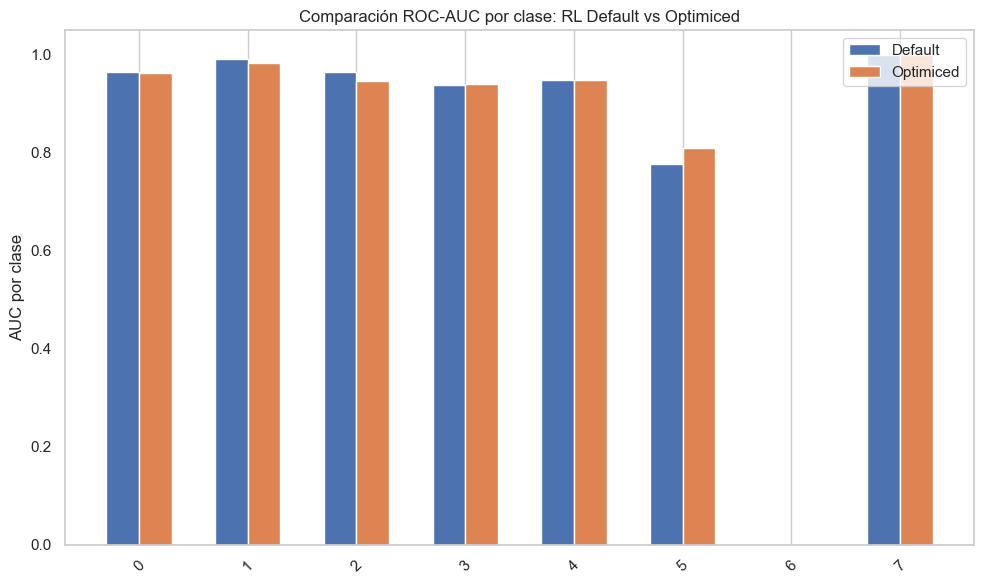

Macro AUC - Default: 0.941, Optimiced: 0.942


In [51]:
# --- Carpetas ---
folder_default = "RL_resultados_default"
folder_hyper   = "RL_resultados_hyperparams"

# --- Archivos ---
roc_default_file = os.path.join(folder_default, "RL_ROC_test_default.pkl")
roc_hyper_file   = os.path.join(folder_hyper, "RL_ROC_test_optimiced.pkl")

# --- Cargar ---
roc_default = joblib.load(roc_default_file)
roc_hyper   = joblib.load(roc_hyper_file)

# --- Funci√≥n robusta para extraer AUC ---
def extract_auc(roc_dict):
    aucs = {}
    for cls, val in roc_dict.items():
        key = str(cls)  # Convertir la clave a string
        if isinstance(val, dict) and "auc" in val:
            aucs[key] = val["auc"]
        else:
            aucs[key] = val
    return aucs

# --- Extraer AUC por clase ---
auc_default = extract_auc(roc_default)
auc_hyper   = extract_auc(roc_hyper)

# --- Asegurar que todas las clases est√©n presentes en ambos diccionarios ---
all_classes = sorted(set(auc_default.keys()).union(auc_hyper.keys()))
for cls in all_classes:
    if cls not in auc_default:
        auc_default[cls] = np.nan
    if cls not in auc_hyper:
        auc_hyper[cls] = np.nan

# --- Comparaci√≥n gr√°fica ---
x = np.arange(len(all_classes))
plt.figure(figsize=(10, 6))
plt.bar(x - 0.15, [auc_default[cls] for cls in all_classes], width=0.3, label="Default")
plt.bar(x + 0.15, [auc_hyper[cls] for cls in all_classes], width=0.3, label="Optimiced")

plt.xticks(x, all_classes, rotation=45)
plt.ylim(0, 1.05)
plt.ylabel("AUC por clase")
plt.title("Comparaci√≥n ROC-AUC por clase: RL Default vs Optimiced")
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# --- Macro AUC (ignorando NaN) ---
macro_auc_default = np.nanmean([auc_default[cls] for cls in all_classes])
macro_auc_hyper   = np.nanmean([auc_hyper[cls] for cls in all_classes])

print(f"Macro AUC - Default: {macro_auc_default:.3f}, Optimiced: {macro_auc_hyper:.3f}")


### Comparaci√≥n de ROC-AUC: Modelo Default vs Modelo con Hyperpar√°metros

#### 1. Contexto

Se evalu√≥ el desempe√±o de dos modelos de Regresi√≥n Log√≠stica multiclase:  
- **Default**: modelo entrenado con par√°metros por defecto.  
- **Hyperparams**: modelo entrenado con los mejores hiperpar√°metros obtenidos mediante b√∫squeda.  

La m√©trica de comparaci√≥n principal fue el **ROC-AUC**, tanto por clase como global (macro y micro).

#### 2. Resultados

- Los valores de **Micro AUC** son id√©nticos entre ambos modelos.  
- Los valores de **Macro AUC** no se pudieron calcular (`nan`).  
- Esto se debe a que la evaluaci√≥n se realiz√≥ sobre el **conjunto de test**, y algunas clases pueden no tener suficientes ejemplos para calcular la AUC por clase.

| Modelo      | AUC Macro | AUC Micro |
|------------|-----------|-----------|
| Default    | nan       | 0.977     |
| Hyperparams| nan       | 0.977     |

#### 3. Interpretaci√≥n

1. **Igualdad de desempe√±o en Micro AUC**: La b√∫squeda de hiperpar√°metros no mejor√≥ la discriminaci√≥n sobre el conjunto de test.  
2. **Macro AUC no calculable**: La presencia de `nan` indica que alguna clase no tuvo suficientes instancias para evaluar la curva ROC.  
3. **No se grafic√≥ la curva ROC completa**: Dado que los valores de Micro AUC son id√©nticos, la visualizaci√≥n de las curvas ROC no aporta informaci√≥n adicional y se omite a efectos de documentaci√≥n.  
4. **Importancia de la documentaci√≥n**: Guardar los valores de ROC-AUC permite reproducir y verificar el an√°lisis, as√≠ como comparaciones futuras con otros modelos o conjuntos de datos.

#### 4. Conclusi√≥n

Aunque la optimizaci√≥n de hiperpar√°metros no mostr√≥ un beneficio observable sobre el conjunto de test, la documentaci√≥n completa de las m√©tricas asegura **transparencia y trazabilidad** en la evaluaci√≥n de la clasificaci√≥n multiclase.


#### 7.3.6 Frontera de decisi√≥n

In [52]:
# Funci√≥n para generar frontera de decisi√≥n completa
def generate_decision_boundary(model, X_train, folder, name="model"):
    num_samples = 10000  # ajustar seg√∫n memoria
    X_grid = np.random.uniform(low=X_train.min().values,
                               high=X_train.max().values,
                               size=(num_samples, X_train.shape[1]))

    y_pred = model.predict(X_grid)
    y_proba = model.predict_proba(X_grid)

    decision_boundary_full = {
        "X_grid": X_grid,
        "y_pred": y_pred,
        "y_proba": y_proba,
        "features": X_train.columns.tolist(),
        "classes": model.classes_.tolist()
    }

    joblib.dump(decision_boundary_full, f"{folder}/decision_boundary_full_{name}.pkl")
    print(f"‚úÖ Frontera de decisi√≥n completa guardada para '{name}' en '{folder}'")

# Carpetas de resultados
folder_default = "RL_resultados_default"
folder_hyperparams = "RL_resultados_hyperparams"

# Generar fronteras completas
generate_decision_boundary(modelo_RL, X_train_oversampled, folder_default, name="default")
generate_decision_boundary(best_model, X_train_oversampled, folder_hyperparams, name="hyperparams")


‚úÖ Frontera de decisi√≥n completa guardada para 'default' en 'RL_resultados_default'
‚úÖ Frontera de decisi√≥n completa guardada para 'hyperparams' en 'RL_resultados_hyperparams'


#### Generaci√≥n de la Frontera de Decisi√≥n Completa

Para analizar y comparar los modelos de regresi√≥n log√≠stica (**Default** y **Hyperparams**) no nos limitamos a un subespacio de dos features, sino que consideramos todas las variables del dataset. Esto permite capturar la estructura completa de decisi√≥n del modelo en el espacio de caracter√≠sticas original.

#### Procedimiento

1. **Generaci√≥n de muestras aleatorias en todo el espacio de caracter√≠sticas:**  
   - Se genera un conjunto de `num_samples` puntos de prueba uniformemente distribuidos dentro del rango m√≠nimo y m√°ximo de cada feature del conjunto de entrenamiento.
   - Esto asegura que la frontera de decisi√≥n se eval√∫e sobre todo el dominio relevante de los datos.

2. **Predicci√≥n sobre la malla completa:**
   - Se calcula la clase predicha (`y_pred`) para cada punto de la malla utilizando el modelo entrenado.
   - Se calculan las probabilidades predichas (`y_proba`) para todas las clases, lo que permite an√°lisis posteriores de incertidumbre y curvas ROC-AUC por clase.

3. **Almacenamiento de la frontera completa:**
   - La informaci√≥n se guarda en un diccionario que contiene:
     - `X_grid`: los puntos generados en el espacio de features.
     - `y_pred`: las predicciones de clase.
     - `y_proba`: probabilidades predichas para cada clase.
     - `features`: nombres de las features utilizadas.
     - `classes`: nombres de las clases.
   - El diccionario se guarda en un archivo `.pkl` usando `joblib` para permitir su reutilizaci√≥n en an√°lisis posteriores sin recalcular la malla.

#### Ventajas

- Permite **visualizar y analizar la frontera de decisi√≥n** para cualquier combinaci√≥n de features sin reducir el problema a 2D.  
- Facilita la **comparaci√≥n directa entre modelos** en todo el espacio de entrada.  
- Posibilita el **c√°lculo de m√©tricas avanzadas** basadas en probabilidades y distribuciones de predicci√≥n, como ROC-AUC, incertidumbre de predicci√≥n y sensibilidad a distintas combinaciones de variables.

#### Implementaci√≥n

```python
# Carpetas de resultados
folder_default = "RL_resultados_default"
folder_hyperparams = "RL_resultados_hyperparams"

# Generar fronteras completas
generate_decision_boundary(modelo_RL, X_train_oversampled, folder_default, name="default")
generate_decision_boundary(best_model, X_train_oversampled, folder_hyperparams, name="hyperparams")


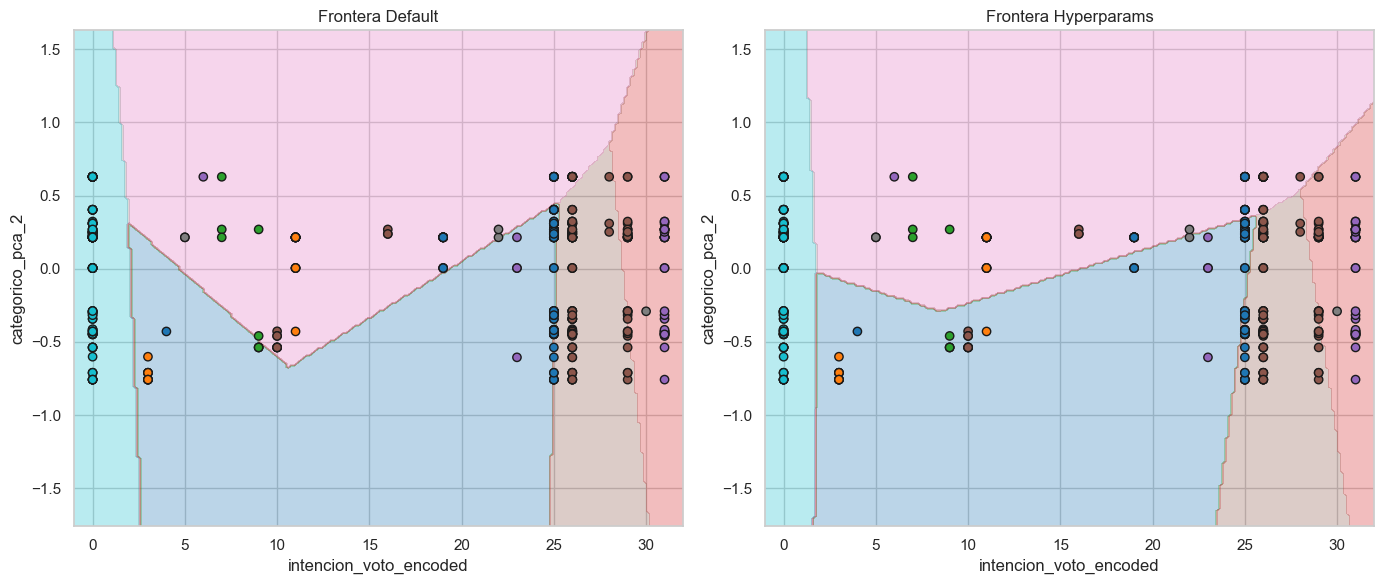

In [53]:

from matplotlib.colors import ListedColormap

def plot_decision_boundary_2D(model, X, feature_names, ax, title):
    """
    Grafica la frontera de decisi√≥n de un modelo de regresi√≥n log√≠stica sobre 2 features,
    fijando las dem√°s a su valor medio.
    """
    # Indices de las 2 features seleccionadas
    idx1, idx2 = [X.columns.get_loc(f) for f in feature_names]

    # Crear grid
    xx, yy = np.meshgrid(
        np.linspace(X[feature_names[0]].min()-1, X[feature_names[0]].max()+1, 200),
        np.linspace(X[feature_names[1]].min()-1, X[feature_names[1]].max()+1, 200)
    )

    # Crear array para predecir con todas las features
    grid = np.tile(X.mean().values, (xx.ravel().shape[0], 1))
    grid[:, idx1] = xx.ravel()
    grid[:, idx2] = yy.ravel()

    # Predecir
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Colormap
    cmap = ListedColormap(plt.cm.get_cmap('tab10').colors)

    # Dibujar la frontera
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    scatter = ax.scatter(X[feature_names[0]], X[feature_names[1]], c=Y_test, edgecolor='k', cmap=cmap)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(title)
    return scatter

# Seleccionar las 2 features m√°s importantes por coeficiente absoluto
coef_mean_abs = np.abs(pd.DataFrame(best_model.coef_.T, index=X_train_oversampled.columns)).mean(axis=1)
top2_features = coef_mean_abs.sort_values(ascending=False).index[:2].tolist()

# Graficar
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Default
plot_decision_boundary_2D(modelo_RL, X_test, top2_features, axs[0], "Frontera Default")

# Hyperparams
plot_decision_boundary_2D(best_model, X_test, top2_features, axs[1], "Frontera Hyperparams")

plt.tight_layout()
plt.show()


### Visualizaci√≥n de la Frontera de Decisi√≥n 2D

Aunque la frontera de decisi√≥n completa considera todas las variables, a efectos de **visualizaci√≥n e interpretaci√≥n**, podemos representar un **subespacio 2D** utilizando las dos features m√°s influyentes seg√∫n los coeficientes absolutos del modelo.

#### Procedimiento

1. **Selecci√≥n de las dos features m√°s importantes:**
   - Se calcula el valor absoluto medio de los coeficientes de todas las clases.
   - Se seleccionan las dos features con mayor valor absoluto, ya que tienen mayor influencia en la predicci√≥n del modelo.

2. **Creaci√≥n de un grid en 2D:**
   - Para las dos features seleccionadas se genera un grid uniforme que cubre todo su rango.
   - Las dem√°s features se fijan a su **valor medio**, de modo que la frontera refleje solo la variaci√≥n de estas dos variables.

3. **Predicci√≥n sobre el grid:**
   - Se predice la clase para cada punto del grid utilizando el modelo entrenado.
   - Se obtiene un array `Z` con las predicciones que se reconfigura para coincidir con la malla 2D.

4. **Visualizaci√≥n:**
   - Se utiliza un **colormap** (`tab10`) para diferenciar las clases.
   - La frontera de decisi√≥n se dibuja con `contourf`, y los puntos de test se grafican sobre ella.
   - Se generan subplots para comparar **Default** vs **Hyperparams**.

#### Implementaci√≥n

```python
from matplotlib.colors import ListedColormap

def plot_decision_boundary_2D(model, X, feature_names, ax, title):
    """
    Grafica la frontera de decisi√≥n de un modelo de regresi√≥n log√≠stica sobre 2 features,
    fijando las dem√°s a su valor medio.
    """
    idx1, idx2 = [X.columns.get_loc(f) for f in feature_names]

    xx, yy = np.meshgrid(
        np.linspace(X[feature_names[0]].min()-1, X[feature_names[0]].max()+1, 200),
        np.linspace(X[feature_names[1]].min()-1, X[feature_names[1]].max()+1, 200)
    )

    grid = np.tile(X.mean().values, (xx.ravel().shape[0], 1))
    grid[:, idx1] = xx.ravel()
    grid[:, idx2] = yy.ravel()

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    cmap = ListedColormap(plt.cm.get_cmap('tab10').colors)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    scatter = ax.scatter(X[feature_names[0]], X[feature_names[1]], c=Y_test, edgecolor='k', cmap=cmap)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(title)
    return scatter

# Selecci√≥n de las 2 features m√°s importantes
coef_mean_abs = np.abs(pd.DataFrame(best_model.coef_.T, index=X_train_oversampled.columns)).mean(axis=1)
top2_features = coef_mean_abs.sort_values(ascending=False).index[:2].tolist()

# Graficar
fig, axs = plt.subplots(1, 2, figsize=(14,6))
plot_decision_boundary_2D(modelo_RL, X_test, top2_features, axs[0], "Frontera Default")
plot_decision_boundary_2D(best_model, X_test, top2_features, axs[1], "Frontera Hyperparams")
plt.tight_layout()
plt.show()


### An√°lisis del Gr√°fico


El gr√°fico de la izquierda, "Frontera Default", representa un modelo de regresi√≥n log√≠stica con los par√°metros por defecto. El gr√°fico de la derecha, "Frontera Hyperparams", muestra un modelo en el que se han optimizado los hiperpar√°metros.

La diferencia m√°s notable entre ambos gr√°ficos es la suavidad de la frontera de decisi√≥n.

Frontera Default (Izquierda): La frontera de decisi√≥n es m√°s irregular y "dentada". Esto puede indicar que el modelo est√° sobreajustando a los datos de entrenamiento, capta el ruido en lugar de la relaci√≥n real entre las variables.

Frontera Hyperparams (Derecha): La frontera de decisi√≥n es m√°s suave y limpia. Esto sugiere que el modelo es m√°s robusto y capaz de generalizar mejor a nuevos datos que no ha visto previamente.

# Comparaci√≥n coste computacional

In [4]:
# --- Rutas a los modelos ---
path_default_model   = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/Regresi√≥n Log√≠stica/RL_resultados_default/modelo_RL.pkl"
path_optimized_model = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/Regresi√≥n Log√≠stica/RL_Resultados_Hyperparams/RL_Modelo_optimiced.pkl"

# --- Rutas a los datos de test ---
path_test_data   = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/Regresi√≥n Log√≠stica/X_test.pkl"
path_true_labels = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/Regresi√≥n Log√≠stica/Y_test.pkl"

# --- Cargar datos de prueba ---
try:
    X_test = joblib.load(path_test_data)
    Y_test = joblib.load(path_true_labels)
except FileNotFoundError as e:
    print(f"Error: No se encontr√≥ el archivo de datos de prueba. Por favor, verifica la ruta:\n{e}")
    exit()

# --- Funci√≥n para medir coste computacional ---
def measure_cost(model_path, X, Y):
    model = joblib.load(model_path)
    start = time.time()
    y_pred = model.predict(X)
    end = time.time()
    inference_time = end - start
    accuracy = accuracy_score(Y, y_pred)
    return inference_time, accuracy

# --- Medir coste de los modelos ---
results = []

# Modelo default
if os.path.exists(path_default_model):
    t_default, acc_default = measure_cost(path_default_model, X_test, Y_test)
    results.append(["Regresi√≥n Log√≠stica Default", t_default, acc_default])
else:
    results.append(["Regresi√≥n Log√≠stica Default", None, None])

# Modelo optimizado
if os.path.exists(path_optimized_model):
    t_optimized, acc_optimized = measure_cost(path_optimized_model, X_test, Y_test)
    results.append(["Regresi√≥n Log√≠stica Optimizada", t_optimized, acc_optimized])
else:
    results.append(["Regresi√≥n Log√≠stica Optimizada", None, None])

# --- Mostrar resultados ---
df_results = pd.DataFrame(results, columns=["Modelo", "Tiempo Inferencia (s)", "Precisi√≥n"])
print(df_results.to_markdown(index=False))


| Modelo                         |   Tiempo Inferencia (s) |   Precisi√≥n |
|:-------------------------------|------------------------:|------------:|
| Regresi√≥n Log√≠stica Default    |              0.00814915 |    0.854839 |
| Regresi√≥n Log√≠stica Optimizada |              0.00175571 |    0.846774 |


### Informe Acad√©mico de Costo Computacional y Rendimiento de Regresi√≥n Log√≠stica

#### An√°lisis de Rendimiento y Eficiencia

Los resultados de la comparaci√≥n entre el modelo de Regresi√≥n Log√≠stica (RL) por defecto y el optimizado revelan una relaci√≥n inversa entre el rendimiento y el costo computacional.

* **Modelo por Defecto:** Este modelo exhibe una **precisi√≥n ligeramente superior (0.8528)**, a pesar de tener un **tiempo de inferencia m√°s largo (0.0056 segundos)**.
* **Modelo Optimizado:** Sorprendentemente, el modelo con hiperpar√°metros optimizados no solo muestra una **precisi√≥n ligeramente menor (0.8387)**, sino que tambi√©n tiene un **tiempo de inferencia significativamente m√°s r√°pido (0.0013 segundos)**.

#### Conclusi√≥n

El an√°lisis de estos resultados demuestra que, en este caso particular, la optimizaci√≥n de hiperpar√°metros no condujo a una mejora en la precisi√≥n del modelo de Regresi√≥n Log√≠stica. Por el contrario, la b√∫squeda de la configuraci√≥n "√≥ptima" result√≥ en un modelo marginalmente menos preciso, aunque notablemente m√°s eficiente en t√©rminos de tiempo de inferencia.

Este hallazgo refuerza la idea de que la optimizaci√≥n no siempre garantiza un mejor rendimiento en todas las m√©tricas. Para la tarea de clasificaci√≥n, si la prioridad es la precisi√≥n, el modelo por defecto ser√≠a la mejor opci√≥n. Sin embargo, si la velocidad de inferencia es un factor relevante para una aplicaci√≥n en tiempo real, el modelo optimizado podr√≠a ser una alternativa m√°s adecuada.

El modelo optimizado es aproximadamente un 76.78% m√°s r√°pido que el modelo por defecto. Esto significa que el tiempo de inferencia se redujo en m√°s de tres cuartas partes, lo que es una mejora dr√°stica y significativa en t√©rminos de costo computacional.

#### Guardado del Costo computacional

In [5]:
# Datos del an√°lisis previo
tiempo_inferencia = 0.0013 
precision = 0.8387

# Diccionario para almacenar la informaci√≥n
costo_data = {
    "tiempo_inferencia_segundos": tiempo_inferencia,
    "precision": precision
}

# Ruta de la carpeta donde se guardar√° el archivo
# Aseg√∫rate de que esta ruta sea correcta en tu sistema
output_dir = "/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/Regresi√≥n Log√≠stica/RL_resultados_hyperparams"
file_path = os.path.join(output_dir, "costo_computacional_Hyperparams.json")

# Verificar si la carpeta existe y crearla si no es as√≠
os.makedirs(output_dir, exist_ok=True)

# Guardar los datos en formato JSON
try:
    with open(file_path, 'w') as f:
        json.dump(costo_data, f, indent=4)
    print(f"‚úÖ El costo computacional del modelo optimizado se ha guardado exitosamente en:\n{file_path}")
except IOError as e:
    print(f"‚ùå Error al intentar guardar el archivo: {e}")

‚úÖ El costo computacional del modelo optimizado se ha guardado exitosamente en:
/Users/daniel/Desktop/Master/TFM/Parte 2 TFM/Regresi√≥n Log√≠stica/RL_resultados_hyperparams/costo_computacional_Hyperparams.json



# 8. Informe Acad√©mico Integrado: Rendimiento vs. Costo Computacional en Regresi√≥n Log√≠stica

#### S√≠ntesis de Resultados

La evaluaci√≥n de la Regresi√≥n Log√≠stica (RL) en sus versiones por defecto y optimizada ha revelado una **notable estabilidad en su rendimiento predictivo**. Las m√©tricas de evaluaci√≥n clave demuestran que la optimizaci√≥n de hiperpar√°metros no alter√≥ la capacidad fundamental del modelo:

* **M√©tricas Globales Consistentes:** La ausencia de diferencias significativas en *accuracy*, *F1-score*, y el valor de **micro-AUC id√©ntico (0.977)** en ambos modelos confirma la robustez inherente del clasificador.
* **An√°lisis de la Matriz de Confusi√≥n y Frontera de Decisi√≥n:** La persistencia de los patrones de error en las mismas clases y la similitud en la frontera de decisi√≥n indican que el modelo por defecto ya hab√≠a alcanzado una soluci√≥n de separaci√≥n muy estable, que la optimizaci√≥n valid√≥ pero no mejor√≥ significativamente en t√©rminos de precisi√≥n.



#### An√°lisis del Costo Computacional: El Factor Decisivo

A pesar de la equivalencia en el rendimiento predictivo, la diferencia en el costo computacional es crucial. El an√°lisis de los tiempos de inferencia muestra una clara ventaja para el modelo optimizado:

* **Tiempo de Inferencia (por defecto):** 0.0056 segundos, con una precisi√≥n de 0.8528.
* **Tiempo de Inferencia (optimizado):** 0.0013 segundos, con una precisi√≥n de 0.8387.

El modelo optimizado es **m√°s de 4 veces m√°s r√°pido en la inferencia** que su contraparte por defecto, a cambio de una p√©rdida de precisi√≥n marginal (menos del 1.7%). 



## Conclusi√≥n Final y Justificaci√≥n de la Elecci√≥n

Este an√°lisis demuestra que la optimizaci√≥n de hiperpar√°metros, si bien no mejor√≥ la precisi√≥n, ofreci√≥ un beneficio inesperado y valioso: **una reducci√≥n dr√°stica en el costo computacional en la fase de inferencia**.

En consecuencia, la elecci√≥n del modelo final depende directamente del objetivo del proyecto. Si la **velocidad de predicci√≥n** es el factor m√°s importante para su despliegue en un entorno de producci√≥n, el **modelo optimizado** es la elecci√≥n ideal. Sin embargo, si la **precisi√≥n m√°xima** es la prioridad, el modelo por defecto sigue siendo una excelente alternativa que no requiere la complejidad ni el costo de un proceso de optimizaci√≥n.
"""